#                          MACHINE LEARNING TECHNIQUES TO PREDICT DISEASES (STROKE, BREAST CANCER AND KYPHOSIS)
###                                                           SS ZG628T: Dissertation
###                                                                            by
###                                                              Bhauyanidhi Sharma
###                                                                     2020mt13031
###                                                              MTech-Software Systems 
###                                                     Research Area: Machine Learning

## Design Model for the Prediction Stroke


## Dataset Selection


## Objective:
To predict/identify the risk factors for stroke.

Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

##### Importing data

In [2]:
df_stroke = pd.read_csv('healthcare-dataset-stroke-data.csv', encoding = 'utf-8')

In [3]:
df_stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df_stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
#Number of records where stroke happened before
df_stroke['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

##### From Dataset infomation, it is observed that for few records BMI information is missing

In [6]:
df_stroke.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [7]:
# Finding records where patient suffered from stroke but had missing value in bmi attribute.
df_stroke[df_stroke['bmi'].isna() & df_stroke['stroke'] == 1]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,Female,61.00,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,27419,Female,59.00,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,8213,Male,78.00,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,25226,Male,57.00,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,61843,Male,58.00,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
29,69160,Male,59.00,0,0,Yes,Private,Rural,211.78,NaN,formerly smoked,1
43,1845,Female,63.00,0,0,Yes,Private,Urban,90.90,NaN,formerly smoked,1
46,37937,Female,75.00,0,1,No,Self-employed,Urban,109.78,NaN,Unknown,1
50,18587,Female,76.00,0,0,No,Private,Urban,89.96,NaN,Unknown,1
51,15102,Male,78.00,1,0,Yes,Private,Urban,75.32,NaN,formerly smoked,1


# Data Preprocessing

In [8]:
#201 records with Missing BMI as NaN values and had stroke
# Let's replace the missing values with mean of BMI attribute
df_stroke['bmi'].fillna(np.round(df_stroke['bmi'].mean(), 1), inplace = True)

In [9]:
# Validating the dataset after filling missing values of BMI
df_stroke[df_stroke['bmi'].isna() & df_stroke['stroke'] == 1]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


Values Corrected

ID attribute identify patients solely. Thus, do not find any relevance to use this attribute for Data Mining. Hence, removing this column.

In [10]:
# Drop the id column
df_stroke.drop(columns=['id'], inplace=True)

In [11]:
df_stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


Dropped ID Column

In [12]:
#Found 1 patient who is categorized as ‘Other’ in the gender column
df_stroke['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [13]:
# We can drop this record because its insignificant to the dataset
df_stroke = df_stroke[df_stroke['gender'] != 'Other']

In [14]:
# Validating the dataset after dropping the record with gender as 'other'
df_stroke[df_stroke['gender'] == 'Other']

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


Data corrected as Gender has now 'Female' & 'Male' only

#### Normalization of Numerical Attributes

In this dataset, there are 3 numerical attributes, i.e. 'age', 'average_glucose_level' and 'bmi'. 
Let’s normalize them to ensure that they have equal weightage when building a classifier
For this we will create new columns, so that it should preserve the original data

In [15]:
# Create a new column for normalized age (Min-Max Normalization)
df_stroke['age_norm']=(df_stroke['age']-df_stroke['age'].min())/(df_stroke['age'].max()-df_stroke['age'].min())

In [16]:
# Create a new column for normalized avg_glucose_level (Min-Max Normalization)
df_stroke['avg_glucose_level_norm']=(df_stroke['avg_glucose_level']-df_stroke['avg_glucose_level'].min())/(df_stroke['avg_glucose_level'].max()-df_stroke['avg_glucose_level'].min())

In [17]:
# Create a new column for normalized bmi (Min-Max Normalization)
df_stroke['bmi_norm']=(df_stroke['bmi']-df_stroke['bmi'].min())/(df_stroke['bmi'].max()-df_stroke['bmi'].min())

In [18]:
#Viewing Data Samples after changes
df_stroke.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_norm,avg_glucose_level_norm,bmi_norm
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,0.816895,0.801265,0.301260
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.9,never smoked,1,0.743652,0.679023,0.213058
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,0.975586,0.234512,0.254296
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,0.597168,0.536008,0.276060
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,0.963379,0.549349,0.156930


New columns got created

#### Discretization of Numerical Attributes

Lets discretized these 3 numerical attributes, i.e. 'age', 'average_glucose_level' and 'bmi' into bins for visualization

In [19]:
# Discretize with respective equal-width bin
df_stroke['age_binned'] = pd.cut(df_stroke['age'], np.arange(0, 91, 5))
df_stroke['avg_glucose_level_binned'] = pd.cut(df_stroke['avg_glucose_level'], np.arange(0, 301, 10))
df_stroke['bmi_binned'] = pd.cut(df_stroke['bmi'], np.arange(0, 101, 5))

# Visualization


Checking for correlation between features - correlation matrix on the numerical attributes

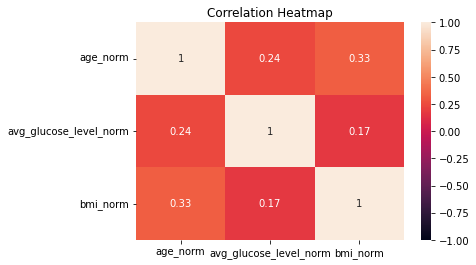

In [20]:
# Create the correlation heatmap
heatmap = sns.heatmap(df_stroke[['age_norm', 'avg_glucose_level_norm', 'bmi_norm']].corr(), vmin=-1, vmax=1, annot=True)
# Create the title
heatmap.set_title('Correlation Heatmap');

#### Insight: It seems like both bmi and age are positively correlated, though the association is not strong

### Histogram to discover any potential relationship between the different attributes and stroke.
Created a function to avoid duplication of codes which takes in the name of the column and outputs the histogram

In [21]:
def get_stroke_stacked_bar_chart(column):
    # Get the count of records by column and stroke    
    df_pct = df_stroke.groupby([column, 'stroke'])['age'].count()
    # Create proper DataFrame's format
    df_pct = df_pct.unstack()    
    return df_pct.plot.bar(stacked=True, figsize=(6,6), width=1);

#### For Age

<AxesSubplot:xlabel='age_binned'>

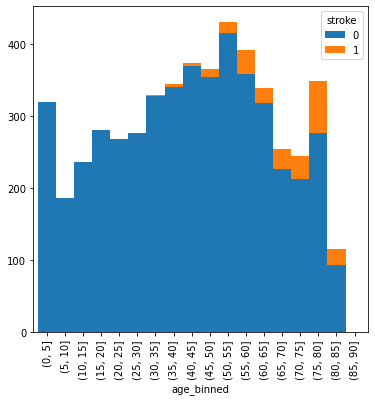

In [22]:
get_stroke_stacked_bar_chart('age_binned')

#### Insight - Older patient is more likely to suffer a stroke than a younger patient

#### For BMI

<AxesSubplot:xlabel='bmi_binned'>

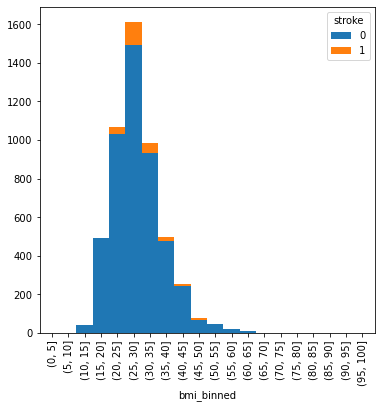

In [23]:
get_stroke_stacked_bar_chart('bmi_binned')

#### Insight - Higher BMI does not increase the stroke risk.


#### For Average Glucose Level

<AxesSubplot:xlabel='avg_glucose_level_binned'>

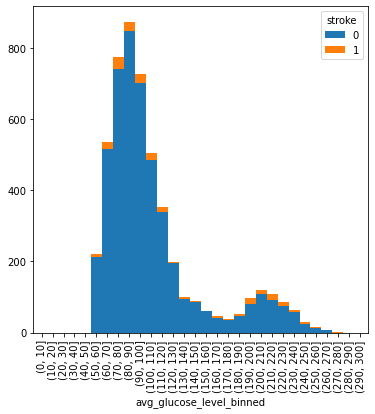

In [24]:
get_stroke_stacked_bar_chart('avg_glucose_level_binned')

#### Insight - Diabetic Patients have an increased risk of stroke.

# Data Analysis

#### Handling Categorical Variables


In [25]:
# converting string to numeric

# gender
df_stroke['gender'] = df_stroke['gender'].map({
'Male': int(0),
'Female':int(1),
'Other':int(2)})

# ever_married
df_stroke['ever_married'] = df_stroke['ever_married'].map({
'Yes':int(1), 
'No':int(0)})

# work_type
df_stroke['work_type'] = df_stroke['work_type'].map({
'Private':int(3), 
'Self-employed':int(4),
'Govt_job':int(2), 
'children':int(1), 
'Never_worked':int(0)})

# Residence_type
df_stroke['Residence_type'] = df_stroke['Residence_type'].map({
'Urban':int(2), 
'Rural':int(1)})

# smoking_status
df_stroke['smoking_status'] = df_stroke['smoking_status'].map({
'formerly smoked':int(1),
'never smoked':int(2), 
'smokes':int(3),
'Unknown':int(0)})

In [26]:
df_stroke.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_norm,avg_glucose_level_norm,bmi_norm,age_binned,avg_glucose_level_binned,bmi_binned
0,0,67.0,0,1,1,3,2,228.69,36.6,1,1,0.816895,0.801265,0.301260,"(65, 70]","(220, 230]","(35, 40]"
1,1,61.0,0,0,1,4,1,202.21,28.9,2,1,0.743652,0.679023,0.213058,"(60, 65]","(200, 210]","(25, 30]"
2,0,80.0,0,1,1,3,1,105.92,32.5,2,1,0.975586,0.234512,0.254296,"(75, 80]","(100, 110]","(30, 35]"
3,1,49.0,0,0,1,3,2,171.23,34.4,3,1,0.597168,0.536008,0.276060,"(45, 50]","(170, 180]","(30, 35]"
4,1,79.0,1,0,1,4,1,174.12,24.0,2,1,0.963379,0.549349,0.156930,"(75, 80]","(170, 180]","(20, 25]"


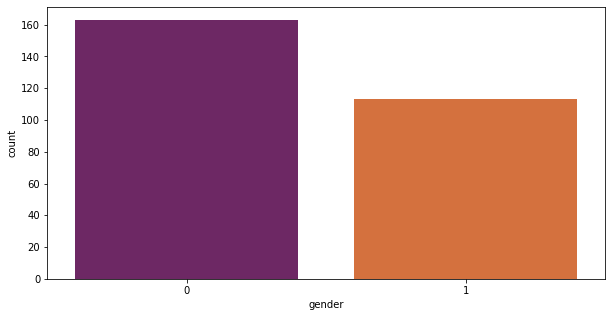

In [27]:
plt.figure(figsize=(10,5))
stroke=df_stroke.loc[df_stroke['heart_disease']==1]
sns.countplot(data=stroke,x='gender',palette='inferno');

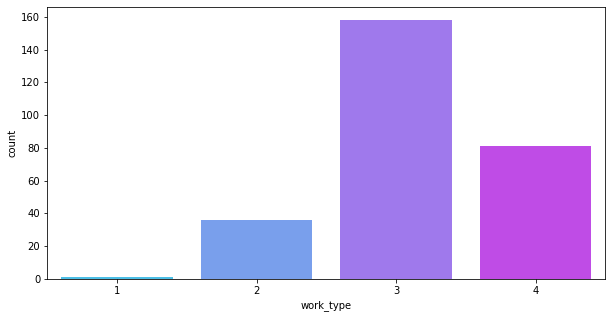

In [28]:
plt.figure(figsize=(10,5))
sns.countplot(data=stroke,x='work_type',palette='cool');

### Plotting Box Plot over Normalized Values of 'Age', 'Avg_Glocose_Level' and 'BMI' to identify Outliers in the data

In [29]:
#Dropping extra columns from the data frame
df_stroke.drop(columns=['gender','hypertension','heart_disease','ever_married','work_type','Residence_type','avg_glucose_level','smoking_status','age_binned','avg_glucose_level_binned','bmi_binned','age','bmi'], inplace=True)

In [30]:
Q1=df_stroke.quantile(q=0.25, axis=0, numeric_only=True, interpolation='linear')
Q2=df_stroke.quantile(q=0.50, axis=0, numeric_only=True, interpolation='linear')
Q3=df_stroke.quantile(q=0.75, axis=0, numeric_only=True, interpolation='linear')
min=df_stroke['age_norm'].min()
max=df_stroke['age_norm'].max()
#Printing Quartile Q1 for the attributes.
print("=============Printing Q1=============")
print(Q1)
print("=============Printing Q2=============")
print(Q2)
print("=============Printing Q3=============")
print(Q3)
print("=============Printing Min=============")
print(min)
print("=============Printing Max=============")
print(max)

IQR=Q3-Q1
print("=============Printing IQR=============")
print(IQR)

Low_limit_Outlier=Q1-1.5*IQR
Upper_limit_Outlier=Q3+1.5*IQR
print("=============Printing Low_limit_Outlier=============")
print(Low_limit_Outlier)

print("=============Printing Upper_limit_Outlier=============")
print(Upper_limit_Outlier)

=============Printing Q1=============
stroke                    0.000000
age_norm                  0.304199
avg_glucose_level_norm    0.102114
bmi_norm                  0.154639
Name: 0.25, dtype: float64
=============Printing Q2=============
stroke                    0.000000
age_norm                  0.548340
avg_glucose_level_norm    0.169698
bmi_norm                  0.207331
Name: 0.5, dtype: float64
=============Printing Q3=============
stroke                    0.000000
age_norm                  0.743652
avg_glucose_level_norm    0.272228
bmi_norm                  0.257732
Name: 0.75, dtype: float64
=============Printing Min=============
0.0
=============Printing Max=============
1.0
=============Printing IQR=============
stroke                    0.000000
age_norm                  0.439453
avg_glucose_level_norm    0.170114
bmi_norm                  0.103093
dtype: float64
=============Printing Low_limit_Outlier=============
stroke                    0.000000e+00
age_norm      

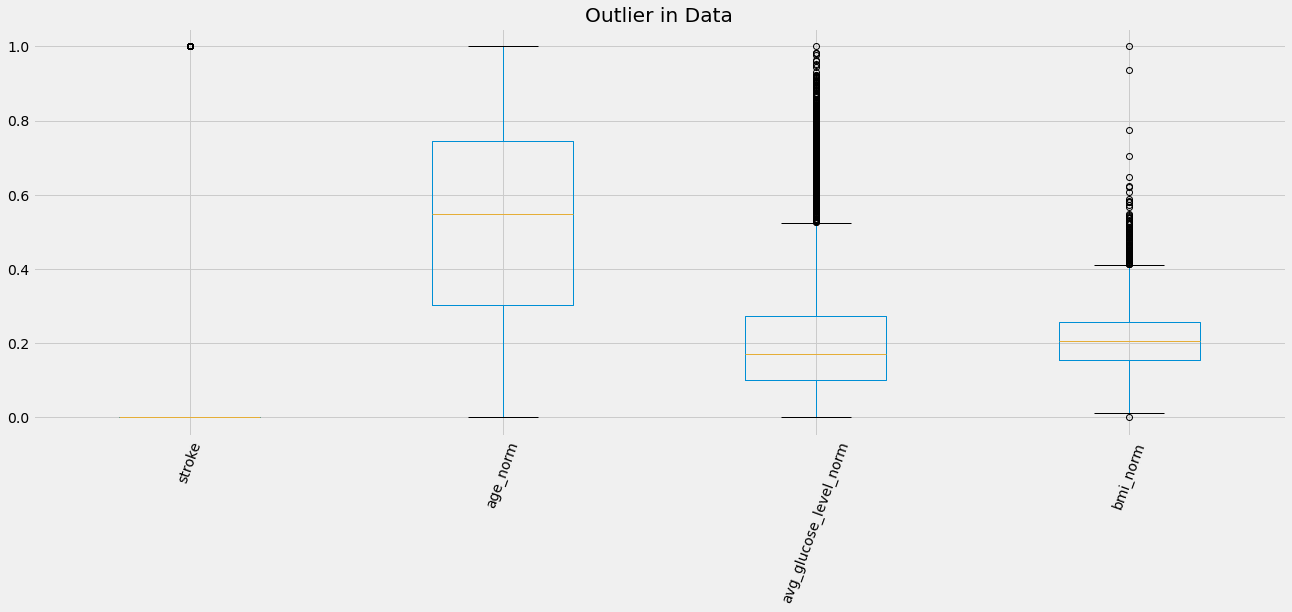

In [31]:
plt.style.use('fivethirtyeight')
boxplot = df_stroke.boxplot(figsize=(20,7))
plt.xticks(rotation=70);
plt.title('Outlier in Data');

### Creating Training and Test Datasets



In [32]:
X = df_stroke.drop(['stroke'],axis = 1)
y = df_stroke.pop('stroke')

## data split

X_train, X_test,y_train,y_test = train_test_split(X, y,test_size=0.20,random_state=42)

## Scaling data

Stroke_scaling = StandardScaler()

X_train = Stroke_scaling.fit_transform(X_train)
X_test = Stroke_scaling.transform(X_test)

In [33]:
# check the number of features and data points in train
print("Number of data points in train: %d" % X_train.shape[0])
print("Number of features in train: %d" % X_train.shape[1])

# check the number of features and data points in test
print("Number of data points in test: %d" % X_test.shape[0])
print("Number of features in test: %d" % X_test.shape[1])

Number of data points in train: 4087
Number of features in train: 3
Number of data points in test: 1022
Number of features in test: 3


### Naive Bayes Classification

[[936  24]
 [ 47  15]]
Accuracy on Train set 0.9248837778321507
Accuracy on Test set 0.9305283757338552
F1-score on Test set: 0.29702970297029707
ROC-AUC Score on Test set: 0.6084677419354839
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       960
           1       0.38      0.24      0.30        62

    accuracy                           0.93      1022
   macro avg       0.67      0.61      0.63      1022
weighted avg       0.92      0.93      0.92      1022



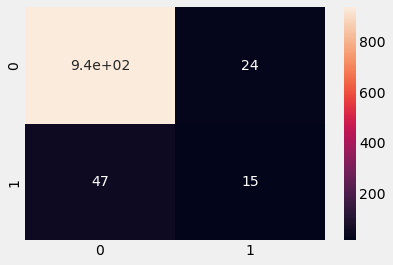

In [34]:
NB_model = GaussianNB()

# fit the model
NB_model.fit(X_train, y_train)

y_predict_NB = NB_model.predict(X_test)

# model score
predict_train_NB = NB_model.predict(X_train)
predict_test_NB = NB_model.predict(X_test)

# accuracy score
NB_train_score = NB_model.score(X_train,y_train)
NB_test_score = NB_model.score(X_test,y_test)

# f1-score
NB_f1_score = metrics.f1_score(y_test,predict_test_NB)
NB_recall = metrics.recall_score(y_test, predict_test_NB)
NB_evaluation = confusion_matrix(y_test,predict_test_NB)
print(NB_evaluation)
NB_roc_auc = roc_auc_score(y_test, predict_test_NB)
sns.heatmap(NB_evaluation, annot=True)
print('Accuracy on Train set',NB_train_score)
print('Accuracy on Test set',NB_test_score)
print('F1-score on Test set:',NB_f1_score)
print('ROC-AUC Score on Test set:',NB_roc_auc)
print(metrics.classification_report(y_test, predict_test_NB))



### KNN

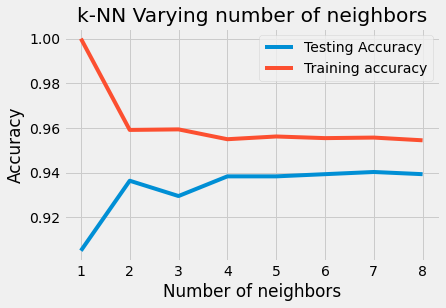

In [35]:
#Setup arrays to store training and test accuracies
knn_neighbors = np.arange(1,9)
knn_train_accuracy =np.empty(len(knn_neighbors))
knn_test_accuracy = np.empty(len(knn_neighbors))

for i,k in enumerate(knn_neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    knn_train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    knn_test_accuracy[i] = knn.score(X_test, y_test) 
    
    #Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(knn_neighbors, knn_test_accuracy, label='Testing Accuracy')
plt.plot(knn_neighbors, knn_train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

##### We can observe above that we get maximum testing accuracy for k=2. So lets create a KNeighborsClassifier with number of neighbors as 2.

[[956   4]
 [ 61   1]]
ROC-AUC Score on Test set: 0.5059811827956989


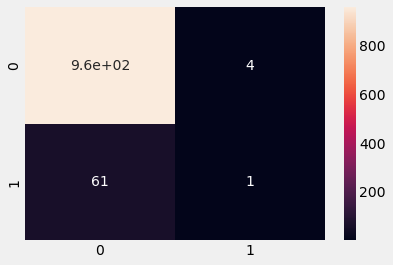

In [36]:
#Setup a KNN classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=2)

#Fit the model
knn.fit(X_train,y_train)

#Get accuracy
knn.score(X_test,y_test)

#let us get the predictions using the classifier we had fit above
knn_prediction = knn.predict(X_test)

knn_evaluation = confusion_matrix(y_test,knn_prediction)
print(knn_evaluation)
KNN_roc_auc = roc_auc_score(y_test, knn_prediction)
sns.heatmap(knn_evaluation, annot=True)
print('ROC-AUC Score on Test set:',KNN_roc_auc)

In [37]:
knn_accuracy = accuracy_score(y_test, knn_prediction)
knn_accuracy

0.9363992172211351

In [38]:
print(classification_report(y_test, knn_prediction))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.20      0.02      0.03        62

    accuracy                           0.94      1022
   macro avg       0.57      0.51      0.50      1022
weighted avg       0.90      0.94      0.91      1022



### SVM


In [39]:

svm_classifier = SVC(random_state = 0, kernel = 'linear')
svm_classifier.fit(X_train, y_train)
svm_prediction = svm_classifier.predict(X_test)

[[960   0]
 [ 62   0]]
ROC-AUC Score on Test set: 0.5


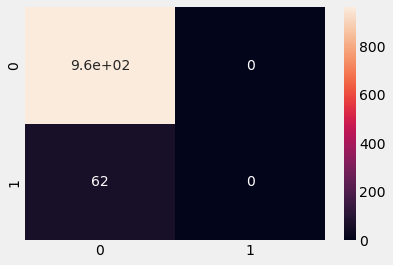

In [40]:
svm_evaluation = confusion_matrix(y_test, svm_prediction)
print(svm_evaluation)
svm_roc_auc = roc_auc_score(y_test, svm_prediction)
sns.heatmap(svm_evaluation, annot=True)
print('ROC-AUC Score on Test set:',svm_roc_auc)

In [41]:

svm_accuracy = accuracy_score(y_test, svm_prediction)
svm_accuracy

0.9393346379647749

In [42]:
print(classification_report(y_test, svm_prediction))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Using Decision Tree Classifier

[[921  39]
 [ 51  11]]
ROC-AUC Score on Test set: 0.5683971774193549


0.9119373776908023

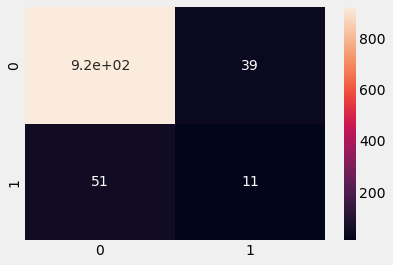

In [43]:

dc = DecisionTreeClassifier(criterion = 'entropy')
dc.fit(X_train, y_train)
dc_prediction = dc.predict(X_test)
dc_evaluation = confusion_matrix(y_test, dc_prediction)
print(dc_evaluation)
dc_roc_auc = roc_auc_score(y_test, dc_prediction)
sns.heatmap(dc_evaluation, annot=True)
print('ROC-AUC Score on Test set:',dc_roc_auc)
dc_accuracy = accuracy_score(y_test, dc_prediction)
dc_accuracy

[Text(0.29926638719512194, 0.9838709677419355, 'X[0] <= 0.461\nentropy = 0.268\nsamples = 4087\nvalue = [3900, 187]'),
 Text(0.07484756097560975, 0.9516129032258065, 'X[0] <= 0.063\nentropy = 0.075\nsamples = 2615\nvalue = [2591, 24]'),
 Text(0.026829268292682926, 0.9193548387096774, 'X[2] <= -0.64\nentropy = 0.033\nsamples = 2051\nvalue = [2044, 7]'),
 Text(0.02195121951219512, 0.8870967741935484, 'entropy = 0.0\nsamples = 793\nvalue = [793, 0]'),
 Text(0.03170731707317073, 0.8870967741935484, 'X[1] <= -1.057\nentropy = 0.05\nsamples = 1258\nvalue = [1251, 7]'),
 Text(0.00975609756097561, 0.8548387096774194, 'X[1] <= -1.063\nentropy = 0.337\nsamples = 32\nvalue = [30, 2]'),
 Text(0.004878048780487805, 0.8225806451612904, 'entropy = 0.0\nsamples = 26\nvalue = [26, 0]'),
 Text(0.014634146341463415, 0.8225806451612904, 'X[1] <= -1.062\nentropy = 0.918\nsamples = 6\nvalue = [4, 2]'),
 Text(0.00975609756097561, 0.7903225806451613, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.0195

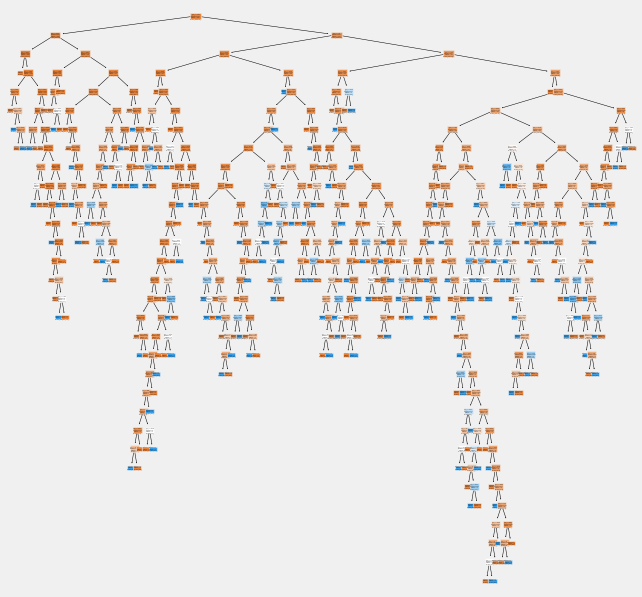

In [44]:

fig = plt.figure(figsize = (10,10))
sklearn.tree.plot_tree(dc, filled = True)

In [45]:
print(classification_report(y_test, dc_prediction))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       960
           1       0.22      0.18      0.20        62

    accuracy                           0.91      1022
   macro avg       0.58      0.57      0.57      1022
weighted avg       0.90      0.91      0.91      1022



[[3900    0]
 [   0  187]]


<AxesSubplot:>

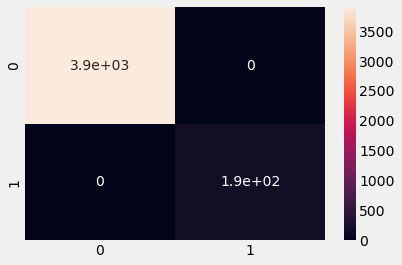

In [46]:
# Predicting the Training set results
from sklearn.ensemble import RandomForestClassifier
stroke_RandomForest = RandomForestClassifier(n_estimators=100)
stroke_RandomForest.fit(X_train, y_train)
y_stroke_predict_train = stroke_RandomForest.predict(X_train)
y_stroke_predict_train
stroke_RandomForest_Train_Evaluation = confusion_matrix(y_train, y_stroke_predict_train)
print(stroke_RandomForest_Train_Evaluation)
sns.heatmap(stroke_RandomForest_Train_Evaluation, annot=True)

[[954   6]
 [ 62   0]]
ROC-AUC Score on Test set: 0.496875


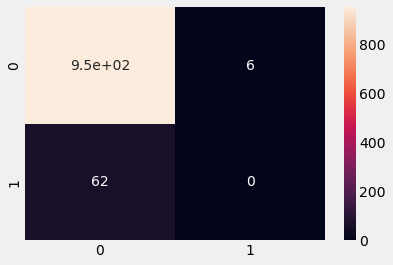

In [47]:
# Predicting the Test set results
y_stroke_RF_predict_test = stroke_RandomForest.predict(X_test)
stroke_RandomForest_Test_Evaluation = confusion_matrix(y_test, y_stroke_RF_predict_test)
print(stroke_RandomForest_Test_Evaluation)
sns.heatmap(stroke_RandomForest_Test_Evaluation, annot=True)
RF_roc_auc = roc_auc_score(y_test, y_stroke_RF_predict_test)
print('ROC-AUC Score on Test set:',RF_roc_auc)

In [48]:
print(classification_report(y_test, y_stroke_RF_predict_test))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.93      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.93      0.91      1022



### Improvement in KNN, Random Forest and SVM Models

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_context('notebook', font_scale= 1.2)

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

#from catboost import CatBoostClassifier
#from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report
#import scikitplot as skplt

from imblearn.over_sampling import RandomOverSampler

In [50]:
Stroke_data_improve = pd.read_csv('healthcare-dataset-stroke-data.csv')
Stroke_data_improve.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [51]:
Stroke_data_improve.drop('id', axis= 1, inplace= True)

In [52]:
Stroke_data_improve.shape

(5110, 11)

In [53]:
Stroke_data_improve.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [54]:
Stroke_data_improve[['hypertension', 'heart_disease', 'stroke']] = Stroke_data_improve[['hypertension', 'heart_disease', 'stroke']].astype(str)

In [55]:
Stroke_data_improve.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   object 
 3   heart_disease      5110 non-null   object 
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   object 
dtypes: float64(3), object(8)
memory usage: 439.3+ KB


In [56]:
Stroke_data_improve.describe()

,age,avg_glucose_level,bmi
count,5110.000000,5110.000000,4909.000000
mean,43.226614,106.147677,28.893237
std,22.612647,45.283560,7.854067
min,0.080000,55.120000,10.300000
25%,25.000000,77.245000,23.500000
50%,45.000000,91.885000,28.100000
75%,61.000000,114.090000,33.100000
max,82.000000,271.740000,97.600000


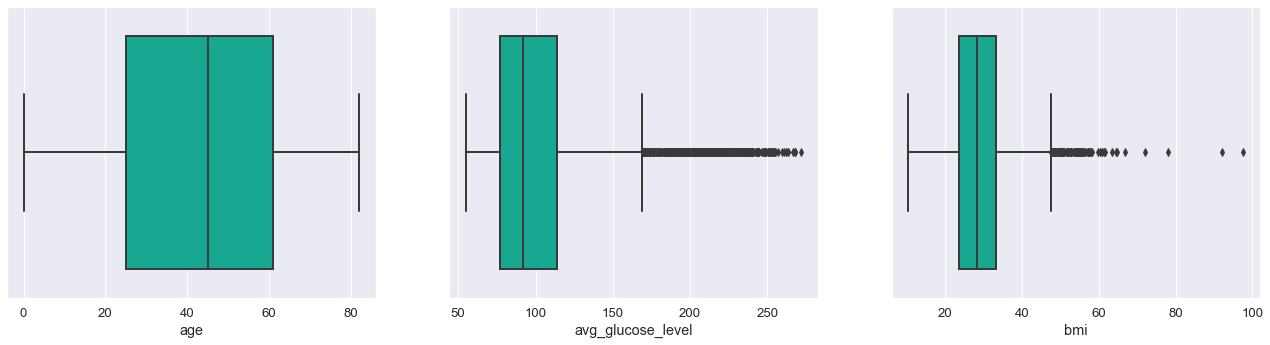

In [57]:
fig, ax = plt.subplots(1, 3, figsize = (20, 5))
sns.boxplot(x = Stroke_data_improve['age'], ax= ax[0], color= '#00C0A1', linewidth= 2)
sns.boxplot(x = Stroke_data_improve['avg_glucose_level'], ax= ax[1], color= '#00C0A1', linewidth= 2)
sns.boxplot(x = Stroke_data_improve['bmi'], ax= ax[2], color= '#00C0A1', linewidth= 2)
plt.show()

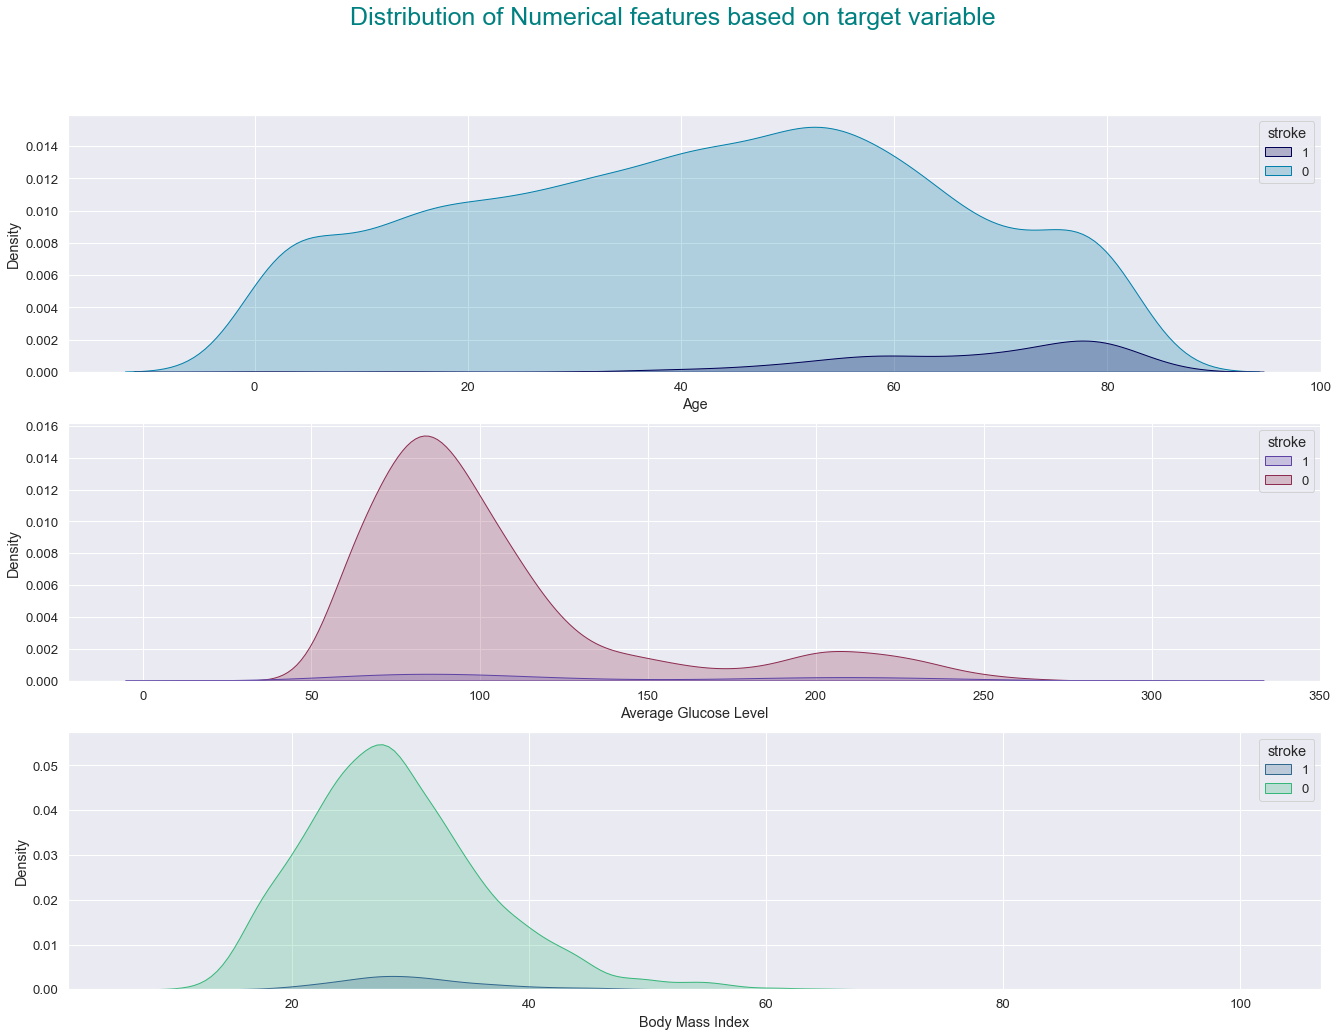

In [58]:
fig, ax = plt.subplots(3, 1, figsize = (20, 15))
plt.suptitle('Distribution of Numerical features based on target variable', fontsize = 25, color = 'teal')
sns.kdeplot(x = Stroke_data_improve['age'], hue= Stroke_data_improve['stroke'], shade= True, ax= ax[0], palette = 'ocean')
ax[0].set(xlabel = 'Age')
sns.kdeplot(x = Stroke_data_improve['avg_glucose_level'], hue= Stroke_data_improve['stroke'], shade= True, ax= ax[1], palette = 'twilight')
ax[1].set(xlabel = 'Average Glucose Level')
sns.kdeplot(x = Stroke_data_improve['bmi'], hue= Stroke_data_improve['stroke'], shade= True, ax= ax[2], palette = 'viridis')
ax[2].set(xlabel = 'Body Mass Index')
plt.show()

In [59]:
for col in ['avg_glucose_level', 'bmi']:
    Stroke_data_improve[col] = np.log(Stroke_data_improve[col])

In [60]:
Stroke_data_improve.describe()

,age,avg_glucose_level,bmi
count,5110.000000,5110.000000,4909.000000
mean,43.226614,4.592465,3.328423
std,22.612647,0.361985,0.265064
min,0.080000,4.009513,2.332144
25%,25.000000,4.346982,3.157000
50%,45.000000,4.520538,3.335770
75%,61.000000,4.736988,3.499533
max,82.000000,5.604846,4.580877


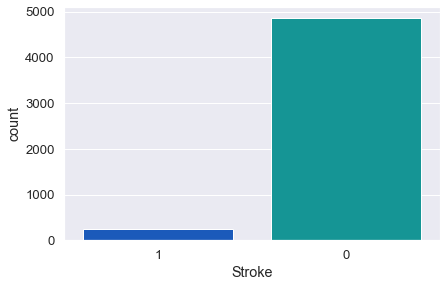

In [61]:
sns.countplot(x = Stroke_data_improve['stroke'], palette= 'winter')
plt.xlabel('Stroke');

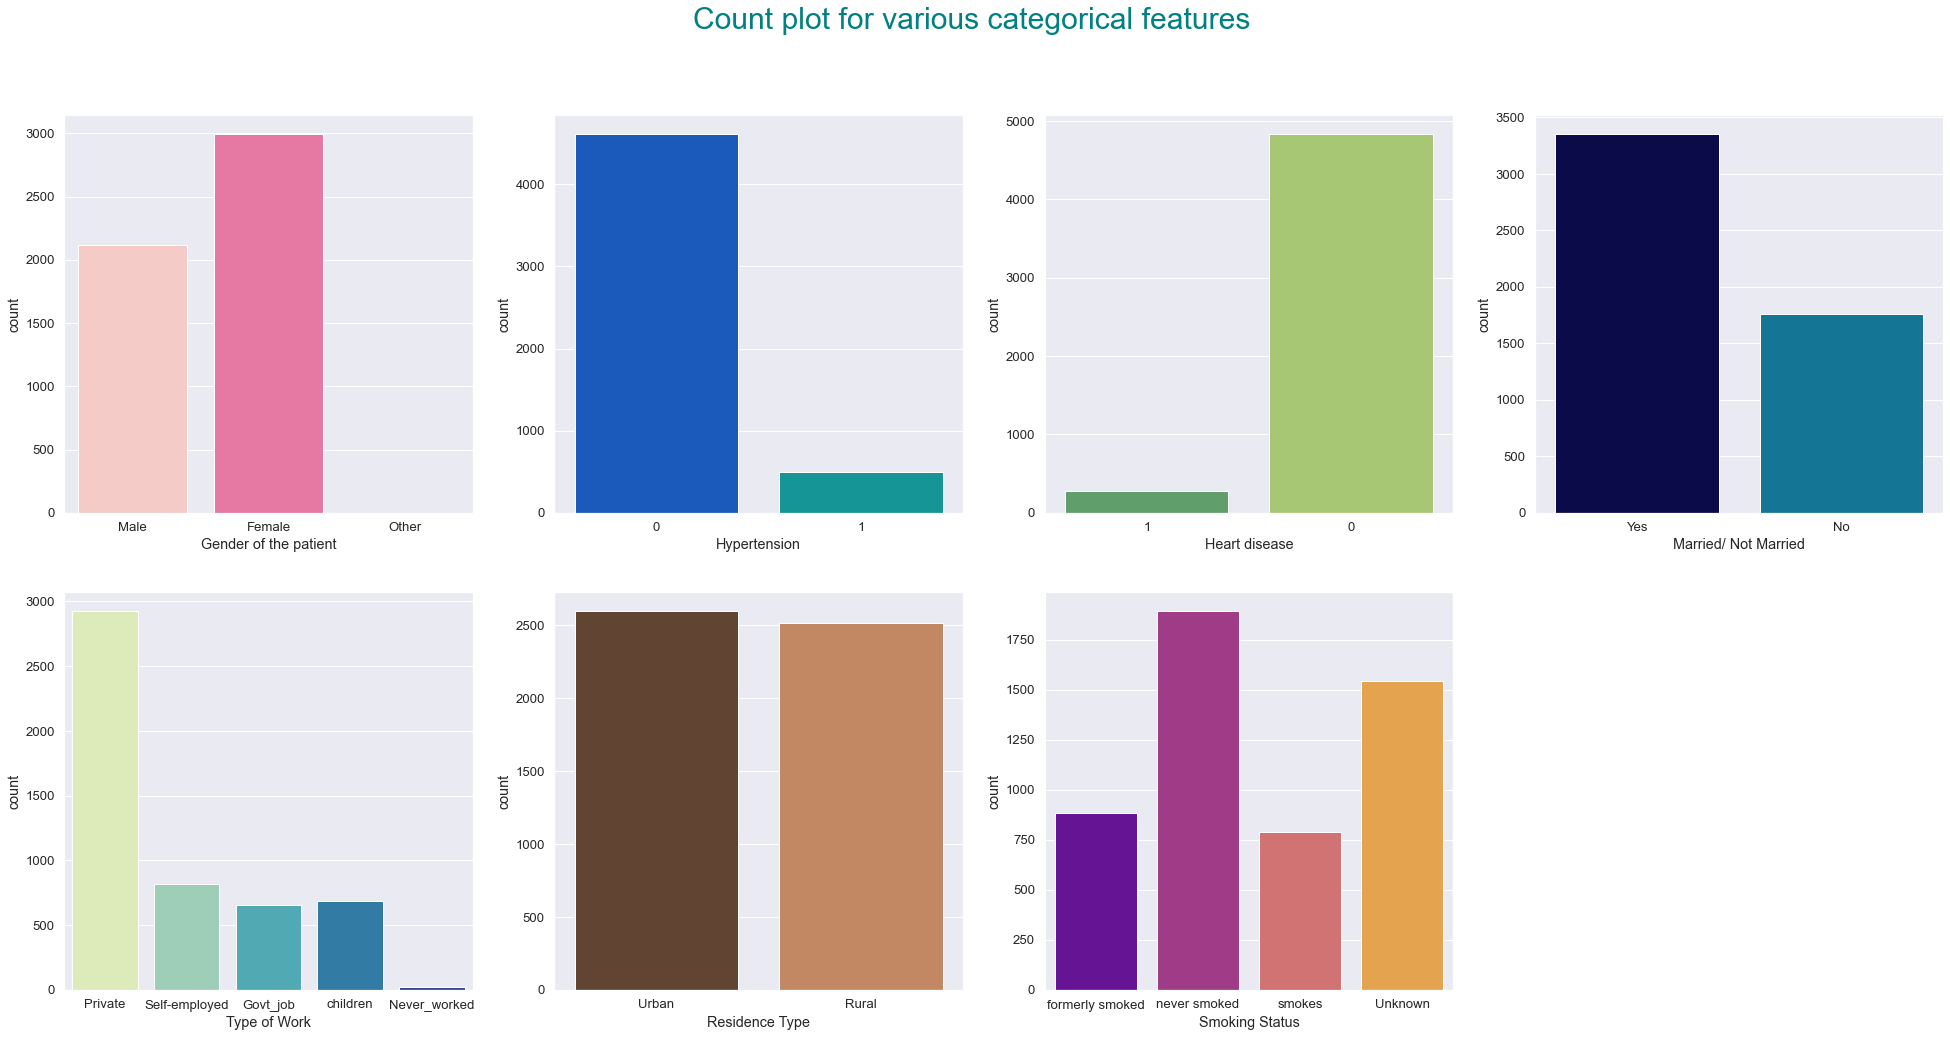

In [62]:
fig, ax = plt.subplots(2, 4, figsize = (30, 15))
ax[1, 3].axis('off')

plt.suptitle('Count plot for various categorical features', fontsize = 30, color= 'teal')

ax1 = sns.countplot(x ='gender', data= Stroke_data_improve, ax= ax[0, 0], palette= 'RdPu')
ax1.set(xlabel = 'Gender of the patient')

ax2 = sns.countplot(x ='hypertension', data= Stroke_data_improve, ax= ax[0, 1], palette= 'winter')
ax2.set(xlabel = 'Hypertension')

ax3 = sns.countplot(x ='heart_disease', data= Stroke_data_improve, ax= ax[0, 2], palette= 'summer')
ax3.set(xlabel = 'Heart disease')

ax4 = sns.countplot(x ='ever_married', data= Stroke_data_improve, ax= ax[0, 3], palette= 'ocean')
ax4.set(xlabel = 'Married/ Not Married')

ax5 = sns.countplot(x ='work_type', data= Stroke_data_improve, ax= ax[1, 0], palette= 'YlGnBu')
ax5.set(xlabel = 'Type of Work')

ax6 = sns.countplot(x ='Residence_type', data= Stroke_data_improve, ax= ax[1, 1], palette= 'copper')
ax6.set(xlabel = 'Residence Type')

ax7 = sns.countplot(x ='smoking_status', data= Stroke_data_improve, ax= ax[1, 2], palette= 'plasma')
ax7.set(xlabel = 'Smoking Status')

plt.show()

In [63]:
Stroke_data_improve['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [64]:
Stroke_data_improve.drop(Stroke_data_improve[Stroke_data_improve['gender'] == 'Other'].index, inplace= True)

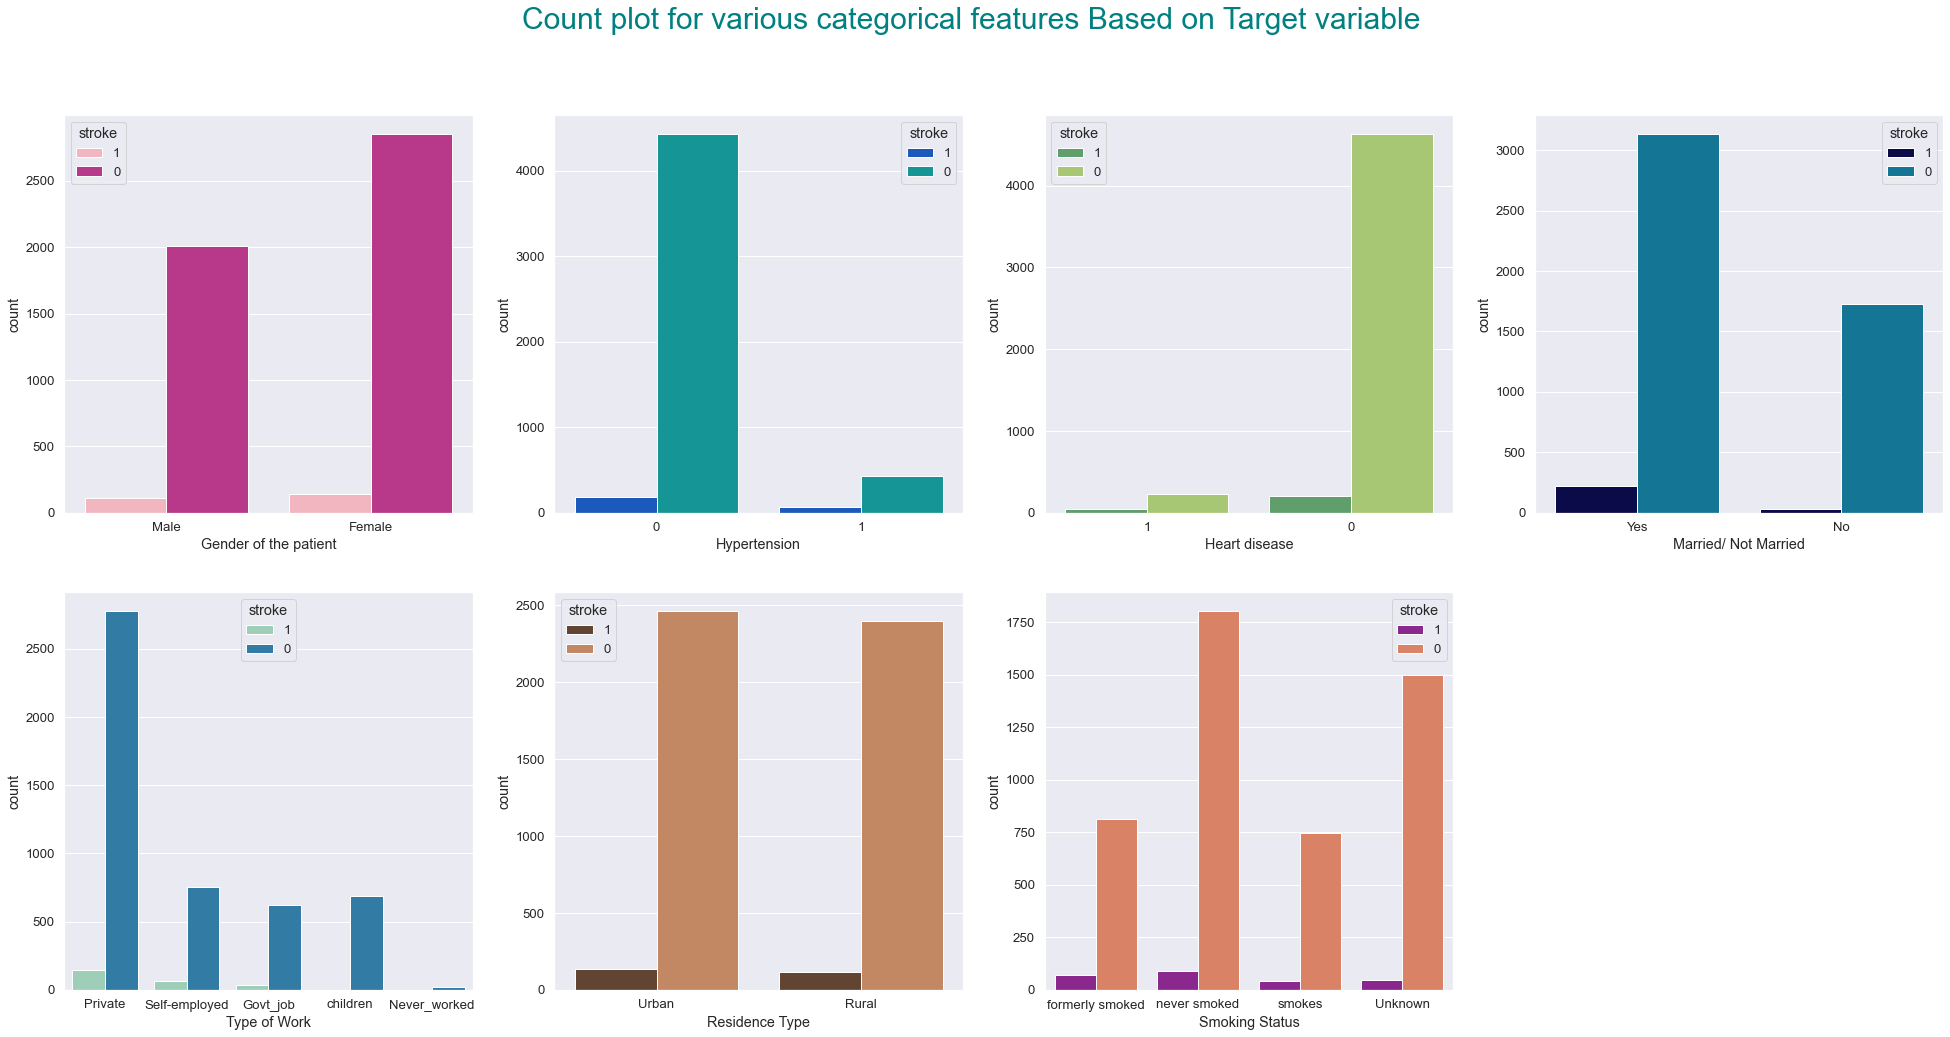

In [65]:
fig, ax = plt.subplots(2, 4, figsize = (30, 15))
ax[1, 3].axis('off')

plt.suptitle('Count plot for various categorical features Based on Target variable', fontsize = 30, color = 'teal')

ax1 = sns.countplot(x ='gender', data= Stroke_data_improve, hue= 'stroke', ax= ax[0, 0], palette= 'RdPu')
ax1.set(xlabel = 'Gender of the patient')

ax2 = sns.countplot(x ='hypertension', data= Stroke_data_improve, hue= 'stroke', ax= ax[0, 1], palette= 'winter')
ax2.set(xlabel = 'Hypertension')

ax3 = sns.countplot(x ='heart_disease', data= Stroke_data_improve, hue= 'stroke', ax= ax[0, 2], palette= 'summer')
ax3.set(xlabel = 'Heart disease')

ax4 = sns.countplot(x ='ever_married', data= Stroke_data_improve, hue= 'stroke', ax= ax[0, 3], palette= 'ocean')
ax4.set(xlabel = 'Married/ Not Married')

ax5 = sns.countplot(x ='work_type', data= Stroke_data_improve, hue= 'stroke', ax= ax[1, 0], palette= 'YlGnBu')
ax5.set(xlabel = 'Type of Work')

ax6 = sns.countplot(x ='Residence_type', data= Stroke_data_improve, hue= 'stroke', ax= ax[1, 1], palette= 'copper')
ax6.set(xlabel = 'Residence Type')

ax7 = sns.countplot(x ='smoking_status', data= Stroke_data_improve, hue= 'stroke', ax= ax[1, 2], palette= 'plasma')
ax7.set(xlabel = 'Smoking Status')

plt.show()

In [66]:
Stroke_data_improve.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [67]:
def knn_impute(df, na_target):
    df = df.copy()
    
    numeric_df = df.select_dtypes(np.number)
    non_na_columns = numeric_df.loc[: ,numeric_df.isna().sum() == 0].columns
    
    y_train = numeric_df.loc[numeric_df[na_target].isna() == False, na_target]
    X_train = numeric_df.loc[numeric_df[na_target].isna() == False, non_na_columns]
    X_test = numeric_df.loc[numeric_df[na_target].isna() == True, non_na_columns]
    
    knn = KNeighborsRegressor()
    knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    
    df.loc[df[na_target].isna() == True, na_target] = y_pred
    
    return df

In [68]:
Stroke_data1_improve = knn_impute(Stroke_data_improve, 'bmi')

In [69]:
Stroke_data1_improve.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [70]:
Stroke_data2_improve = pd.get_dummies(Stroke_data1_improve, drop_first= True)

In [71]:
Stroke_data2_improve.head()

,age,avg_glucose_level,bmi,gender_Male,hypertension_1,heart_disease_1,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke_1
0,67.0,5.432367,3.600048,1,0,1,1,0,1,0,0,1,1,0,0,1
1,61.0,5.309307,3.535493,0,0,0,1,0,0,1,0,0,0,1,0,1
2,80.0,4.662684,3.481240,1,0,1,1,0,1,0,0,0,0,1,0,1
3,49.0,5.143008,3.538057,0,0,0,1,0,1,0,0,1,0,0,1,1
4,79.0,5.159745,3.178054,0,1,0,1,0,0,1,0,0,0,1,0,1


In [72]:
s = StandardScaler()
Stroke_data2_improve[['bmi', 'avg_glucose_level', 'age']] = s.fit_transform(Stroke_data2_improve[['bmi', 'avg_glucose_level', 'age']])

In [73]:
Stroke_data3_improve = Stroke_data2_improve.copy()
Stroke_data3_improve.head()

,age,avg_glucose_level,bmi,gender_Male,hypertension_1,heart_disease_1,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke_1
0,1.051242,2.320709,1.027679,1,0,1,1,0,1,0,0,1,1,0,0,1
1,0.785889,1.980714,0.781547,0,0,0,1,0,0,1,0,0,0,1,0,1
2,1.626174,0.194204,0.574693,1,0,1,1,0,1,0,0,0,0,1,0,1
3,0.255182,1.521257,0.791320,0,0,0,1,0,1,0,0,1,0,0,1,1
4,1.581949,1.567499,-0.581283,0,1,0,1,0,0,1,0,0,0,1,0,1


In [74]:
oversample = RandomOverSampler(sampling_strategy='minority')
X=Stroke_data3_improve.drop(['stroke_1'],axis=1)
y=Stroke_data3_improve['stroke_1']
X_over, y_over = oversample.fit_resample(X, y)

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size= 0.2, random_state= 42)

In [76]:
print(y_train.value_counts())
print(y_test.value_counts())

1    3892
0    3884
Name: stroke_1, dtype: int64
0    976
1    968
Name: stroke_1, dtype: int64


[[931  45]
 [  0 968]]
Accuracy: 0.9768518518518519
ROC AUC Score: 0.9769467213114754
              precision    recall  f1-score   support

           0       1.00      0.95      0.98       976
           1       0.96      1.00      0.98       968

    accuracy                           0.98      1944
   macro avg       0.98      0.98      0.98      1944
weighted avg       0.98      0.98      0.98      1944



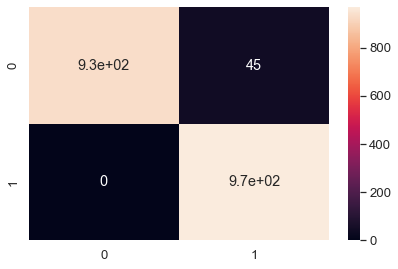

In [77]:
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)
y_pred_prob_knn = knn.predict_proba(X_test)[:, 1]
improve_Stroke_knn_evaluation = confusion_matrix(y_test,y_pred_knn)
print(improve_Stroke_knn_evaluation)
sns.heatmap(improve_Stroke_knn_evaluation, annot=True)
#skplt.metrics.plot_confusion_matrix(y_test, y_pred_knn, figsize=(6,6), cmap= 'YlGnBu');
print('Accuracy:', accuracy_score(y_test, y_pred_knn))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_prob_knn))
print(classification_report(y_test, y_pred_knn))

[[966  10]
 [  0 968]]
Accuracy: 0.9948559670781894
ROC AUC Score: 1.0
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       976
           1       0.99      1.00      0.99       968

    accuracy                           0.99      1944
   macro avg       0.99      0.99      0.99      1944
weighted avg       0.99      0.99      0.99      1944



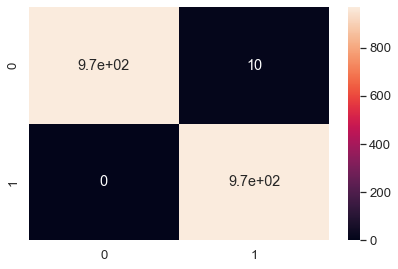

In [78]:
rf = RandomForestClassifier(n_estimators= 100)
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)
y_pred_prob_rf = rf.predict_proba(X_test)[:, 1]
improve_RF_Stroke_evaluation = confusion_matrix(y_test,y_pred_rf)
print(improve_RF_Stroke_evaluation)
sns.heatmap(improve_RF_Stroke_evaluation, annot=True)
#skplt.metrics.plot_confusion_matrix(y_test, y_pred_rf, figsize=(6,6), cmap= 'YlGnBu');
print('Accuracy:', accuracy_score(y_test, y_pred_rf))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_prob_rf))
print(classification_report(y_test, y_pred_rf))

[[976   0]
 [  0 968]]
Accuracy: 1.0
ROC AUC Score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       976
           1       1.00      1.00      1.00       968

    accuracy                           1.00      1944
   macro avg       1.00      1.00      1.00      1944
weighted avg       1.00      1.00      1.00      1944



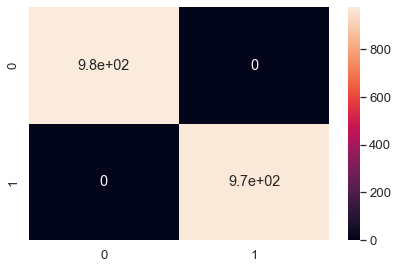

In [79]:
parameters = {
    'C':[0.001, 0.01,0.1,1,10, 100, 1000], 
    'gamma':[0.001, 0.01,0.1,1,100, 1000]
}

svm = RandomizedSearchCV(SVC(probability= True), parameters, cv=5)
svm.fit(X_train,y_train)
y_pred_svm = svm.predict(X_test)
y_pred_prob_svm = svm.predict_proba(X_test)[:, 1]
improve_SVM_Stroke_evaluation = confusion_matrix(y_test,y_pred_svm)
print(improve_SVM_Stroke_evaluation)
sns.heatmap(improve_SVM_Stroke_evaluation, annot=True)
#skplt.metrics.plot_confusion_matrix(y_test, y_pred_svm, figsize=(6,6), cmap= 'YlGnBu');
print('Accuracy:', accuracy_score(y_test, y_pred_svm))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_prob_svm))
print(classification_report(y_test, y_pred_svm))

## Design Model for the Prediction of Breast Cancer 

## BREAST CANCER CLASSIFICATION USING SUPPORT VECTOR MACHINES

###STEP #1: PROBLEM STATEMENT


- Predicting if the cancer diagnosis is benign or malignant based on several observations/features 
- 30 features are used, examples:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

- Datasets are linearly separable using all 30 input features
- Number of Instances: 569
- Class Distribution: 212 Malignant, 357 Benign
- Target class:
         - Malignant
         - Benign




## STEP #2: IMPORTING DATA

In [80]:
# import libraries 
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import seaborn as sns # Statistical data visualization
# %matplotlib inline

In [81]:
# Import Cancer data drom the Sklearn library
from sklearn.datasets import load_breast_cancer
df_Breastcancer = load_breast_cancer()
# df_Breastcancer = pd.read_csv('breast_cancer.csv', encoding = 'utf-8')

In [82]:
df_Breastcancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [83]:
df_Breastcancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [84]:
print(df_Breastcancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [85]:
print(df_Breastcancer['target_names'])

['malignant' 'benign']


In [86]:
print(df_Breastcancer['feature_names'])

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [87]:
print(df_Breastcancer['data'])

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


In [88]:
df_Breastcancer['data'].shape

(569, 30)

In [89]:
df_Breastcancer_upd = pd.DataFrame(np.c_[df_Breastcancer['data'], df_Breastcancer['target']], columns = np.append(df_Breastcancer['feature_names'], ['target']))

In [90]:
df_Breastcancer_upd.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [91]:
df_Breastcancer_upd.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.256,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.463,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.075,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.595,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,0.3857,1.428,2.548,19.15,0.007189,0.00466,0.00000,0.00000,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1.0


In [92]:
x = np.array([1,2,3])
x.shape

(3,)

In [93]:
Breastcancer_Example = np.c_[np.array([1,2,3]), np.array([4,5,6])]
Breastcancer_Example.shape

(3, 2)

## STEP #3: DATA VISUALIZING

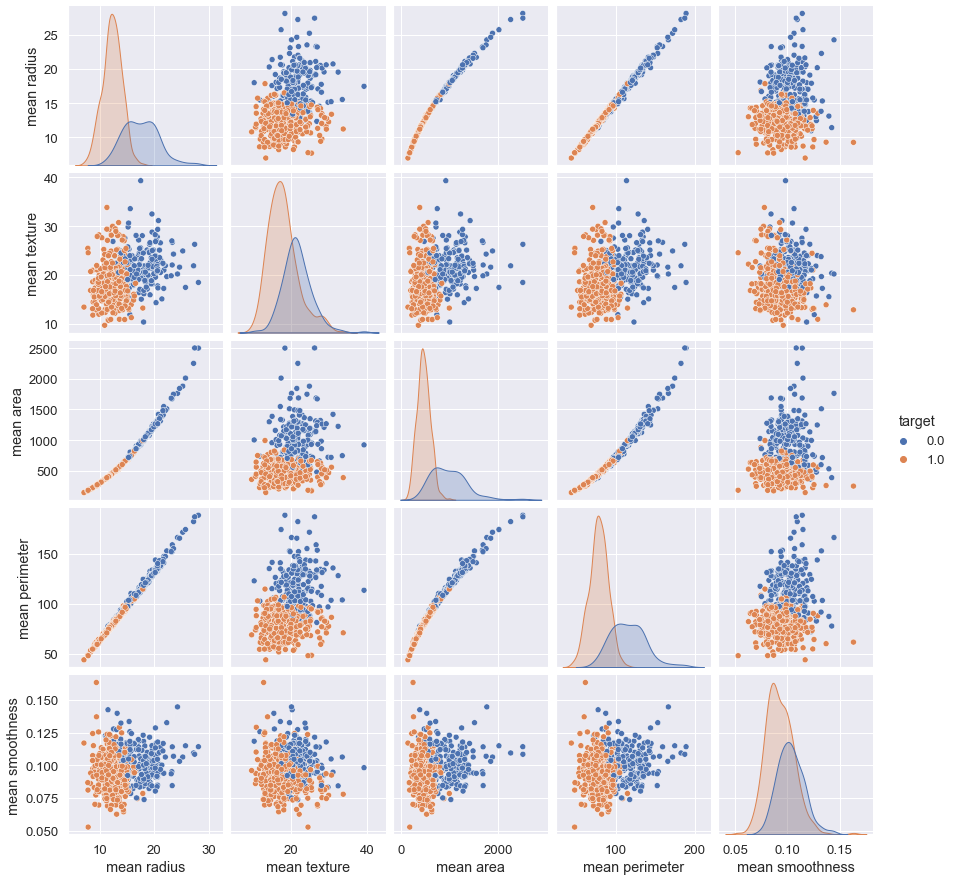

In [94]:
sns.pairplot(df_Breastcancer_upd, hue = 'target', vars = ['mean radius', 'mean texture', 'mean area', 'mean perimeter', 'mean smoothness'] )

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

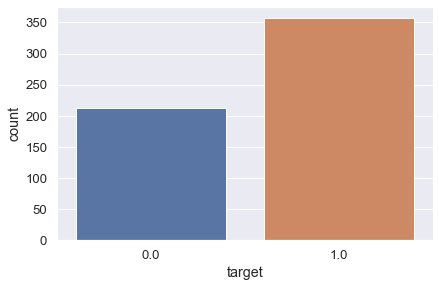

In [95]:
sns.countplot(df_Breastcancer_upd['target'], label = "Count") 

<AxesSubplot:xlabel='mean area', ylabel='mean smoothness'>

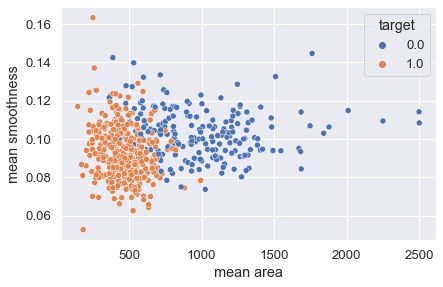

In [96]:
sns.scatterplot(x = 'mean area', y = 'mean smoothness', hue = 'target', data = df_Breastcancer_upd)

<AxesSubplot:>

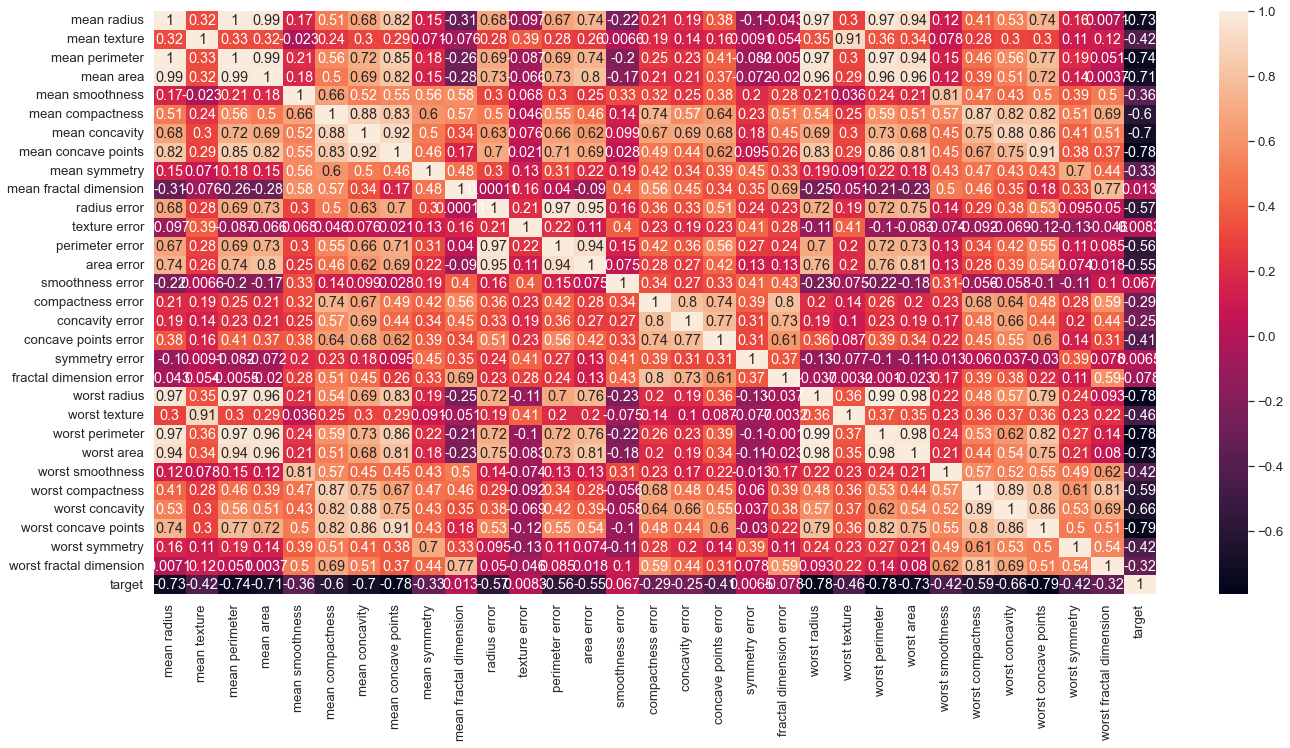

In [97]:
# Let's check the correlation between the variables 
# Strong correlation between the mean radius and mean perimeter, mean area and mean primeter
plt.figure(figsize=(20,10)) 
sns.heatmap(df_Breastcancer_upd.corr(), annot=True) 

## STEP #4: MODEL TRAINING

In [98]:

# Let's drop the target label coloumns
X = df_Breastcancer_upd.drop(['target'],axis=1)


In [99]:
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [100]:
y = df_Breastcancer_upd['target']
y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
564    0.0
565    0.0
566    0.0
567    0.0
568    1.0
Name: target, Length: 569, dtype: float64

### Splitting Data into 2 parts Training Set and Test Set

In [101]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=5)

In [102]:
X_train.shape

(455, 30)

In [103]:
X_test.shape

(114, 30)

In [104]:
y_train.shape

(455,)

In [105]:
y_test.shape

(114,)

In [106]:
from sklearn.svm import SVC 
from sklearn.metrics import classification_report, confusion_matrix

svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

## STEP #5: EVALUATING THE MODEL

In [107]:
y_predict = svc_model.predict(X_test)
breast_cancer_svc_evaluation = confusion_matrix(y_test, y_predict)
breast_cancer_svc_roc_auc = roc_auc_score(y_test, y_predict)

In [108]:
print(breast_cancer_svc_evaluation)
print('ROC-AUC Score on Test set:',breast_cancer_svc_roc_auc)

[[41  7]
 [ 0 66]]
ROC-AUC Score on Test set: 0.9270833333333333


<AxesSubplot:>

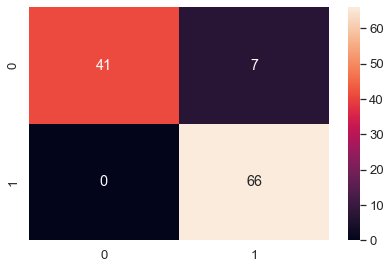

In [109]:
sns.heatmap(breast_cancer_svc_evaluation, annot=True)

In [110]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       1.00      0.85      0.92        48
         1.0       0.90      1.00      0.95        66

    accuracy                           0.94       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.94      0.94      0.94       114



[[44  4]
 [ 2 64]]
Accuracy on Train set 0.9362637362637363
Accuracy on Test set 0.9473684210526315
F1-score on Test set: 0.955223880597015
ROC-AUC Score on Test set: 0.9431818181818182
              precision    recall  f1-score   support

         0.0       0.96      0.92      0.94        48
         1.0       0.94      0.97      0.96        66

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.95       114
weighted avg       0.95      0.95      0.95       114



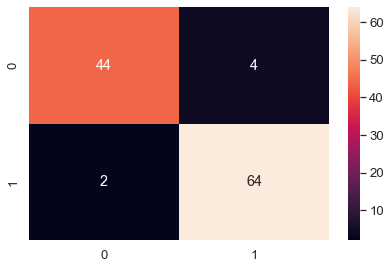

In [111]:
NB_Cancer = GaussianNB()

# fit the model
NB_Cancer.fit(X_train, y_train)

y_cancer_predict_NB = NB_Cancer.predict(X_test)

# model score
cancer_predict_train_NB = NB_Cancer.predict(X_train)
cancer_predict_test_NB = NB_Cancer.predict(X_test)

# accuracy score
NB_train_score_cancer = NB_Cancer.score(X_train,y_train)
NB_test_score_cancer = NB_Cancer.score(X_test,y_test)

# f1-score
NB_f1_score_cancer = metrics.f1_score(y_test,cancer_predict_test_NB)
NB_recall_cancer = metrics.recall_score(y_test, cancer_predict_test_NB)
cancer_NB_evaluation = confusion_matrix(y_test,cancer_predict_test_NB)
print(cancer_NB_evaluation)
cancer_NB_roc_auc = roc_auc_score(y_test, y_cancer_predict_NB)
sns.heatmap(cancer_NB_evaluation, annot=True)

print('Accuracy on Train set',NB_train_score_cancer)
print('Accuracy on Test set',NB_test_score_cancer)
print('F1-score on Test set:',NB_f1_score_cancer)
print('ROC-AUC Score on Test set:',cancer_NB_roc_auc)
print(metrics.classification_report(y_test, cancer_predict_test_NB))

In [112]:

cancer_NB_evaluation = confusion_matrix(y_test, y_cancer_predict_NB)
print(cancer_NB_evaluation)

[[44  4]
 [ 2 64]]


<AxesSubplot:>

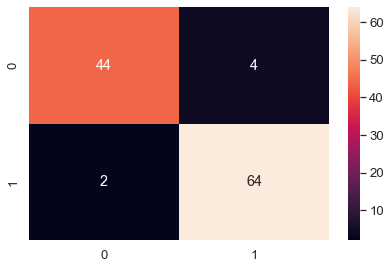

In [113]:
sns.heatmap(cancer_NB_evaluation, annot=True)

In [114]:
print(classification_report(y_test, y_cancer_predict_NB))

              precision    recall  f1-score   support

         0.0       0.96      0.92      0.94        48
         1.0       0.94      0.97      0.96        66

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.95       114
weighted avg       0.95      0.95      0.95       114



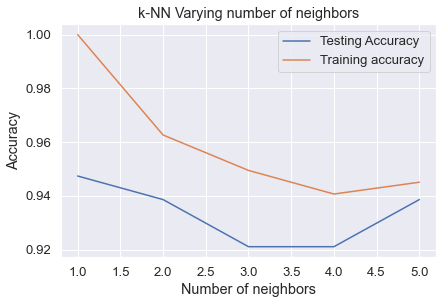

In [115]:
#Setup arrays to store training and test accuracies
cancer_knn_neighbors = np.arange(1,6)
cancer_knn_train_accuracy =np.empty(len(cancer_knn_neighbors))
cancer_knn_test_accuracy = np.empty(len(cancer_knn_neighbors))

for i,k in enumerate(cancer_knn_neighbors):
    #Setup a knn classifier with k neighbors
    cancer_knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    cancer_knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    cancer_knn_train_accuracy[i] = cancer_knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    cancer_knn_test_accuracy[i] = cancer_knn.score(X_test, y_test) 
    
    #Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(cancer_knn_neighbors, cancer_knn_test_accuracy, label='Testing Accuracy')
plt.plot(cancer_knn_neighbors, cancer_knn_train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [116]:
#Setup a KNN classifier with k neighbors
cancer_knn = KNeighborsClassifier(n_neighbors=6)

#Fit the model
cancer_knn.fit(X_train,y_train)

#Get accuracy
cancer_knn.score(X_test,y_test)

#let us get the predictions using the classifier we had fit above
cancer_knn_prediction = cancer_knn.predict(X_test)

cancer_knn_evaluation = confusion_matrix(y_test,cancer_knn_prediction)
print(cancer_knn_evaluation)

[[43  5]
 [ 1 65]]


In [117]:
cancer_knn_accuracy = accuracy_score(y_test, cancer_knn_prediction)
cancer_knn_accuracy
cancer_knn_roc_auc = roc_auc_score(y_test, cancer_knn_prediction)
print('Accuracy on Test set',cancer_knn_accuracy)
print('ROC-AUC Score on Test set:',cancer_knn_roc_auc)

Accuracy on Test set 0.9473684210526315
ROC-AUC Score on Test set: 0.9403409090909092


<AxesSubplot:>

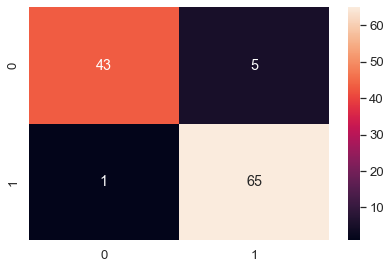

In [118]:
sns.heatmap(cancer_knn_evaluation, annot=True)

In [119]:
print(classification_report(y_test, cancer_knn_prediction))

              precision    recall  f1-score   support

         0.0       0.98      0.90      0.93        48
         1.0       0.93      0.98      0.96        66

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.95       114
weighted avg       0.95      0.95      0.95       114



In [120]:
cancer_dc = DecisionTreeClassifier(criterion = 'entropy')
cancer_dc.fit(X_train, y_train)
cancer_dc_prediction = cancer_dc.predict(X_test)
cancer_dc_evaluation = confusion_matrix(y_test, cancer_dc_prediction)
print(cancer_dc_evaluation)

cancer_dc_accuracy = accuracy_score(y_test, cancer_dc_prediction)
cancer_dc_accuracy
cancer_dc_roc_auc = roc_auc_score(y_test, cancer_dc_prediction)
print('Accuracy on Test set',cancer_dc_accuracy)
print('ROC-AUC Score on Test set:',cancer_dc_roc_auc)

[[42  6]
 [ 3 63]]
Accuracy on Test set 0.9210526315789473
ROC-AUC Score on Test set: 0.9147727272727273


[Text(0.4305555555555556, 0.9285714285714286, 'X[22] <= 101.65\nentropy = 0.943\nsamples = 455\nvalue = [164, 291]'),
 Text(0.16666666666666666, 0.7857142857142857, 'X[28] <= 0.425\nentropy = 0.139\nsamples = 256\nvalue = [5, 251]'),
 Text(0.1111111111111111, 0.6428571428571429, 'X[1] <= 21.315\nentropy = 0.093\nsamples = 254\nvalue = [3, 251]'),
 Text(0.05555555555555555, 0.5, 'entropy = 0.0\nsamples = 214\nvalue = [0, 214]'),
 Text(0.16666666666666666, 0.5, 'X[7] <= 0.025\nentropy = 0.384\nsamples = 40\nvalue = [3, 37]'),
 Text(0.1111111111111111, 0.35714285714285715, 'entropy = 0.0\nsamples = 30\nvalue = [0, 30]'),
 Text(0.2222222222222222, 0.35714285714285715, 'X[19] <= 0.003\nentropy = 0.881\nsamples = 10\nvalue = [3, 7]'),
 Text(0.16666666666666666, 0.21428571428571427, 'X[22] <= 97.27\nentropy = 0.811\nsamples = 4\nvalue = [3, 1]'),
 Text(0.1111111111111111, 0.07142857142857142, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.2222222222222222, 0.07142857142857142, 'entrop

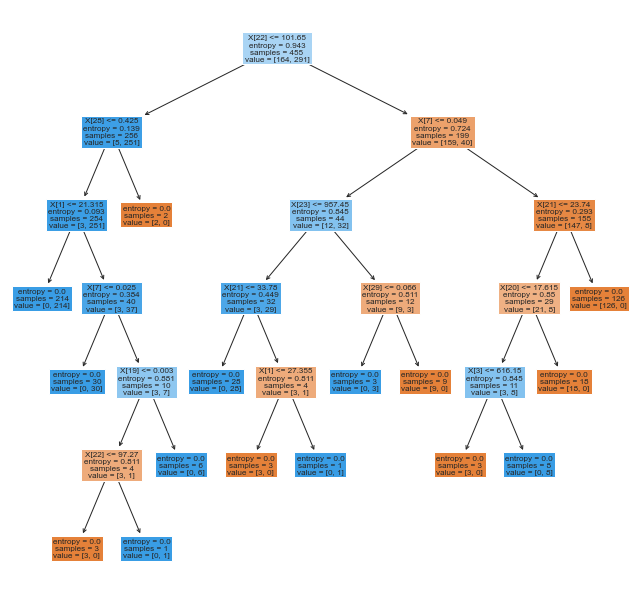

In [121]:

fig = plt.figure(figsize = (10,10))
sklearn.tree.plot_tree(cancer_dc, filled = True)

<AxesSubplot:>

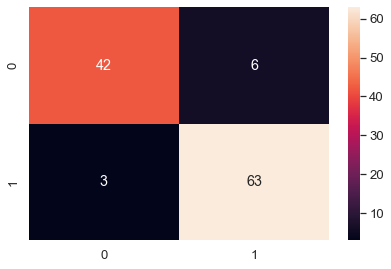

In [122]:
sns.heatmap(cancer_dc_evaluation, annot=True)

In [123]:
print(classification_report(y_test, cancer_dc_prediction))

              precision    recall  f1-score   support

         0.0       0.93      0.88      0.90        48
         1.0       0.91      0.95      0.93        66

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.92       114
weighted avg       0.92      0.92      0.92       114



<AxesSubplot:>

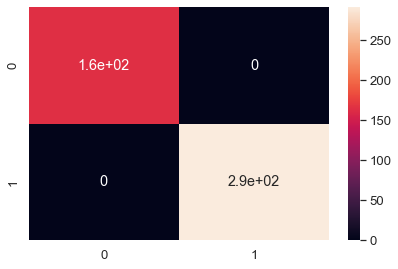

In [124]:
# Predicting the Training set results
from sklearn.ensemble import RandomForestClassifier
cancer_RandomForest = RandomForestClassifier(n_estimators=100)
cancer_RandomForest.fit(X_train, y_train)
y_cancer_predict_train = cancer_RandomForest.predict(X_train)
y_cancer_predict_train
cancer_RandomForest_Train_Evaluation = confusion_matrix(y_train, y_cancer_predict_train)
sns.heatmap(cancer_RandomForest_Train_Evaluation, annot=True)

[[45  3]
 [ 0 66]]
Accuracy on Test set 0.9736842105263158
ROC-AUC Score on Test set: 0.96875


<AxesSubplot:>

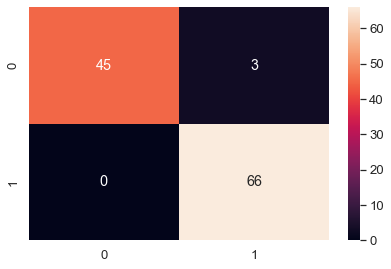

In [125]:
# Predicting the Test set results
y_cancer_predict_test = cancer_RandomForest.predict(X_test)
cancer_RandomForest_Test_Evaluation = confusion_matrix(y_test, y_cancer_predict_test)
cancer_RF_accuracy = accuracy_score(y_test, y_cancer_predict_test)
cancer_dc_accuracy
cancer_RF_roc_auc = roc_auc_score(y_test, y_cancer_predict_test)
print(cancer_RandomForest_Test_Evaluation)
print('Accuracy on Test set',cancer_RF_accuracy)
print('ROC-AUC Score on Test set:',cancer_RF_roc_auc)
sns.heatmap(cancer_RandomForest_Test_Evaluation, annot=True)

In [126]:
print(classification_report(y_test, y_cancer_predict_test))

              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97        48
         1.0       0.96      1.00      0.98        66

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



## STEP #6: IMPROVING THE MODEL

In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import time

In [128]:
improvement_cancer_data = pd.read_csv('breast_cancer_with_header.csv', index_col=False)
improvement_cancer_data.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [129]:
print(improvement_cancer_data.shape)

(569, 33)


In [130]:
improvement_cancer_data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [131]:
improvement_cancer_data['diagnosis'] = improvement_cancer_data['diagnosis'].apply(lambda x: '1' if x == 'M' else '0')
improvement_cancer_data = improvement_cancer_data.set_index('id')
del improvement_cancer_data['Unnamed: 32']

In [132]:
print(improvement_cancer_data.groupby('diagnosis').size())

diagnosis
0    357
1    212
dtype: int64


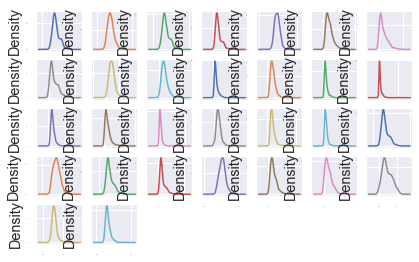

In [133]:
improvement_cancer_data.plot(kind='density', subplots=True, layout=(5,7), sharex=False, legend=False, fontsize=1)
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_12176\1196402368.py:10: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(cax, ticks=[.75,.8,.85,.90,.95,1])


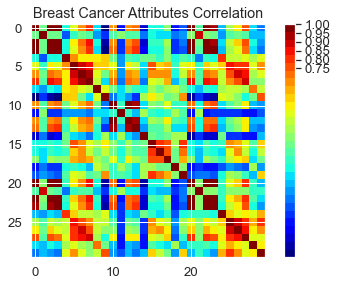

In [134]:
from matplotlib import cm as cm

fig = plt.figure()
ax1 = fig.add_subplot(111)
cmap = cm.get_cmap('jet', 30)
cax = ax1.imshow(improvement_cancer_data.corr(), interpolation="none", cmap=cmap)
ax1.grid(True)
plt.title('Breast Cancer Attributes Correlation')
# Add colorbar, make sure to specify tick locations to match desired ticklabels
fig.colorbar(cax, ticks=[.75,.8,.85,.90,.95,1])
plt.show()

In [135]:
Y = improvement_cancer_data['diagnosis'].values
X = improvement_cancer_data.drop('diagnosis', axis=1).values

X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.20, random_state=21)

In [136]:
models_list = []
models_list.append(('CART', DecisionTreeClassifier()))
models_list.append(('SVM', SVC())) 
models_list.append(('NB', GaussianNB()))
models_list.append(('KNN', KNeighborsClassifier()))

In [137]:
num_folds = 10
results = []
names = []

for name, model in models_list:
    kfold = KFold(n_splits=num_folds)
    start = time.time()
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    end = time.time()
    results.append(cv_results)
    names.append(name)
    print( "%s: %f (%f) (run time: %f)" % (name, cv_results.mean(), cv_results.std(), end-start))

CART: 0.918744 (0.040734) (run time: 0.083949)
SVM: 0.907681 (0.054723) (run time: 0.066958)
NB: 0.940773 (0.033921) (run time: 0.021493)
KNN: 0.927729 (0.055250) (run time: 0.944415)


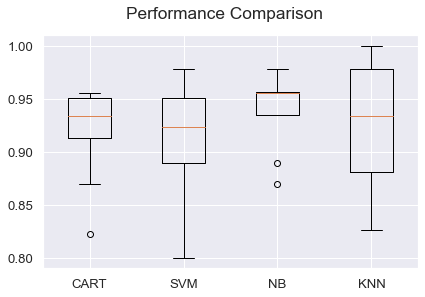

In [138]:
fig = plt.figure()
fig.suptitle('Performance Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [139]:
import warnings

# Standardize the dataset
pipelines = []

pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART',
                                                                        DecisionTreeClassifier())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC( ))])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB',
                                                                      GaussianNB())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',
                                                                       KNeighborsClassifier())])))
results = []
names = []
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    kfold = KFold(n_splits=num_folds)
    for name, model in pipelines:
        start = time.time()
        cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
        end = time.time()
        results.append(cv_results)
        names.append(name)
        print( "%s: %f (%f) (run time: %f)" % (name, cv_results.mean(), cv_results.std(), end-start))

ScaledCART: 0.918744 (0.040577) (run time: 0.092939)
ScaledSVM: 0.964879 (0.038621) (run time: 0.081949)
ScaledNB: 0.931932 (0.038625) (run time: 0.033982)
ScaledKNN: 0.958357 (0.038595) (run time: 0.769519)


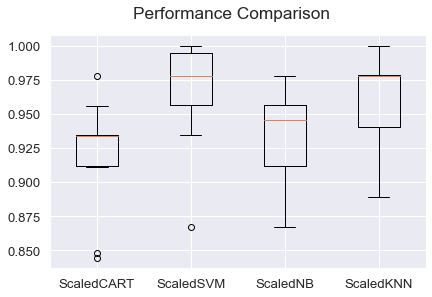

In [140]:
fig = plt.figure()
fig.suptitle('Performance Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [141]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC()
kfold = KFold(n_splits=num_folds)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.969324 using {'C': 2.0, 'kernel': 'rbf'}
0.964976 (0.026211) with: {'C': 0.1, 'kernel': 'linear'}
0.828551 (0.054707) with: {'C': 0.1, 'kernel': 'poly'}
0.940725 (0.038380) with: {'C': 0.1, 'kernel': 'rbf'}
0.949469 (0.032899) with: {'C': 0.1, 'kernel': 'sigmoid'}
0.962754 (0.029531) with: {'C': 0.3, 'kernel': 'linear'}
0.863720 (0.050997) with: {'C': 0.3, 'kernel': 'poly'}
0.956039 (0.032900) with: {'C': 0.3, 'kernel': 'rbf'}
0.960386 (0.029499) with: {'C': 0.3, 'kernel': 'sigmoid'}
0.956184 (0.030988) with: {'C': 0.5, 'kernel': 'linear'}
0.879034 (0.053507) with: {'C': 0.5, 'kernel': 'poly'}
0.964879 (0.030054) with: {'C': 0.5, 'kernel': 'rbf'}
0.956087 (0.027848) with: {'C': 0.5, 'kernel': 'sigmoid'}
0.954010 (0.031644) with: {'C': 0.7, 'kernel': 'linear'}
0.885604 (0.038275) with: {'C': 0.7, 'kernel': 'poly'}
0.967053 (0.037461) with: {'C': 0.7, 'kernel': 'rbf'}
0.949565 (0.027831) with: {'C': 0.7, 'kernel': 'sigmoid'}
0.951836 (0.028830) with: {'C': 0.9, 'kernel': 'linear'

In [142]:
# prepare the model
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
model = SVC(C=2.0, kernel='rbf')
start = time.time()
model.fit(X_train_scaled, Y_train)
end = time.time()
print( "Run Time: %f" % (end-start))

Run Time: 0.005996


[[74  1]
 [ 0 39]]
Accuracy on Test set 0.9912280701754386
ROC-AUC Score on Test set: 0.9933333333333334


<AxesSubplot:>

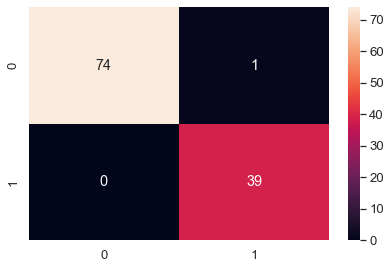

In [143]:
# estimate accuracy on test dataset
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    X_test_scaled = scaler.transform(X_test)
predictions = model.predict(X_test_scaled)
SVM_Cancer_roc_auc = roc_auc_score(Y_test, predictions)
print(confusion_matrix(Y_test, predictions))
print('Accuracy on Test set',accuracy_score(Y_test, predictions))
print('ROC-AUC Score on Test set:',SVM_Cancer_roc_auc)
sns.heatmap(confusion_matrix(Y_test, predictions), annot=True)

In [144]:
print("Accuracy score %f" % accuracy_score(Y_test, predictions))
print(classification_report(Y_test, predictions))

Accuracy score 0.991228
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        75
           1       0.97      1.00      0.99        39

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



## Design Model for the Prediction of Kyphosis

### Model TO CLASSIFY KYPHOSIS DISEASE USING DECISION TREES AND RANDOM FOREST CLASSIFIER

### PROBLEM STATEMENT

- Kyphosis is an abnormally excessive convex curvature of the spine. The kyphosis data frame has 81 rows and 4 columns. representing data on children who have had corrective spinal surgery. Dataset contains 3 inputs and 1 output

INPUTS: 
- Age: in months
- Number: the number of vertebrae involved
- Start: the number of the first (topmost) vertebra operated on.

OUTPUTS:
- Kyphosis: a factor with levels absent present indicating if a kyphosis (a type of deformation) was present after the operation.


### Importing Libraries

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import confusion_matrix,classification_report

### Importing Data

In [146]:
Kyphosis_df = pd.read_csv("kyphosis.csv")

In [147]:
Kyphosis_df.head(10)

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
5,absent,1,2,16
6,absent,61,2,17
7,absent,37,3,16
8,absent,113,2,16
9,present,59,6,12


In [148]:
Kyphosis_df.tail()

,Kyphosis,Age,Number,Start
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6
80,absent,36,4,13


In [149]:
Kyphosis_df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


In [150]:
Kyphosis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


### Data Visualization

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Kyphosis', ylabel='count'>

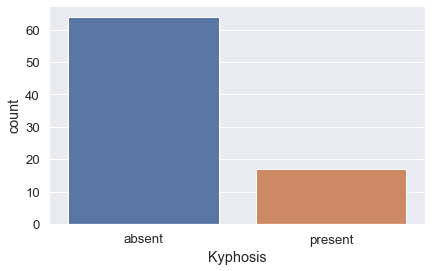

In [151]:
sns.countplot(Kyphosis_df['Kyphosis'], label = "Count") 

In [152]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
LabelEncoder_y = LabelEncoder()
Kyphosis_df['Kyphosis'] = LabelEncoder_y.fit_transform(Kyphosis_df['Kyphosis'])

In [153]:
Kyphosis_df

,Kyphosis,Age,Number,Start
0,0,71,3,5
1,0,158,3,14
2,1,128,4,5
3,0,2,5,1
4,0,1,4,15
...,...,...,...,...
76,1,157,3,13
77,0,26,7,13
78,0,120,2,13
79,1,42,7,6


In [154]:
Kyphosis_True = Kyphosis_df[Kyphosis_df['Kyphosis']==1]

In [155]:
Kyphosis_False = Kyphosis_df[Kyphosis_df['Kyphosis']==0]

In [156]:
print( 'Disease present after operation percentage =', (len(Kyphosis_True) / len(Kyphosis_df) )*100,"%")

Disease present after operation percentage = 20.98765432098765 %


<AxesSubplot:>

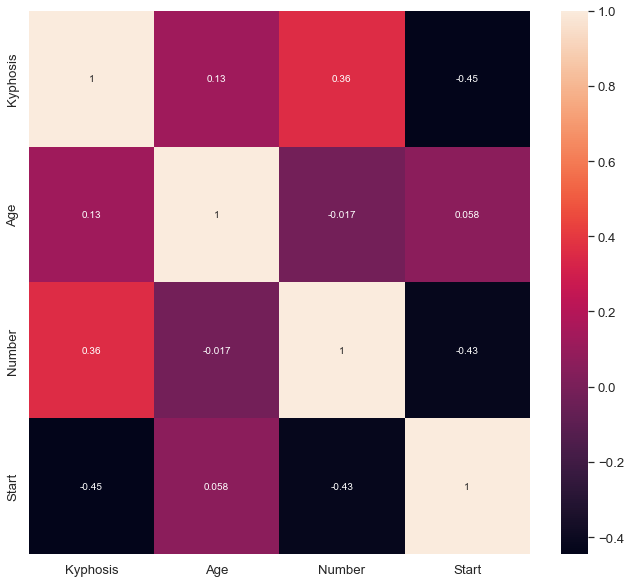

In [157]:
plt.figure(figsize=(10,10)) 
sns.heatmap(Kyphosis_df.corr(), annot=True) 

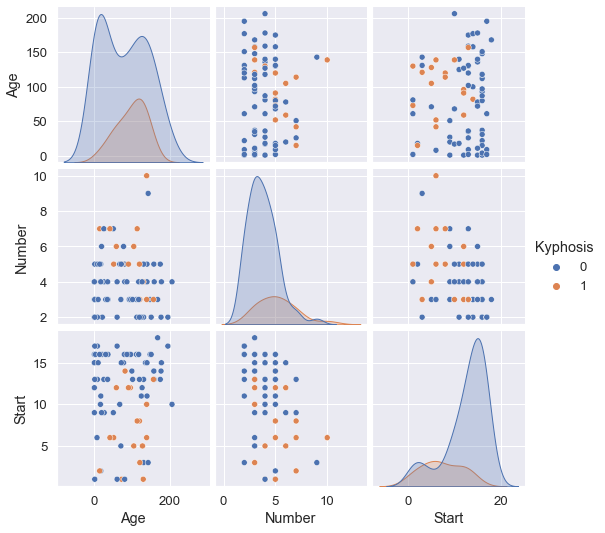

In [158]:
sns.pairplot(Kyphosis_df, hue='Kyphosis', vars = ['Age', 'Number', 'Start'])

### Splitting the data into Training DataSet and Testing DataSet


In [159]:
# Let's drop the target label coloumns
X = Kyphosis_df.drop(['Kyphosis'],axis=1)
y = Kyphosis_df['Kyphosis']

In [160]:
X

,Age,Number,Start
0,71,3,5
1,158,3,14
2,128,4,5
3,2,5,1
4,1,4,15
...,...,...,...
76,157,3,13
77,26,7,13
78,120,2,13
79,42,7,6


In [161]:
y

0     0
1     0
2     1
3     0
4     0
     ..
76    1
77    0
78    0
79    1
80    0
Name: Kyphosis, Length: 81, dtype: int32

In [162]:
from sklearn.model_selection import train_test_split

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Model Training

In [164]:
X_train.shape

(56, 3)

In [165]:
y_train.shape

(56,)

In [166]:
X_test.shape

(25, 3)

In [167]:
y_test.shape

(25,)

In [168]:
from sklearn.tree import DecisionTreeClassifier
Kyphosis_decision_tree = DecisionTreeClassifier()
Kyphosis_decision_tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [169]:
Kyphosis_feature_importances = pd.DataFrame(Kyphosis_decision_tree.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

In [170]:
Kyphosis_feature_importances

,importance
Age,0.426022
Start,0.304892
Number,0.269086


#### Model Evaluation

In [171]:
from sklearn.metrics import classification_report, confusion_matrix


[[46  0]
 [ 0 10]]


<AxesSubplot:>

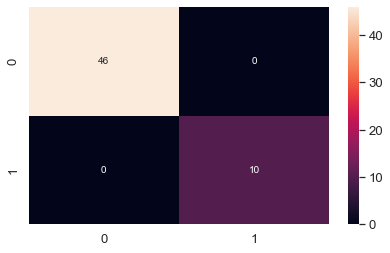

In [172]:
y_predict_train = Kyphosis_decision_tree.predict(X_train)
y_predict_train
Kyphosis_decision_tree_train_evaluation = confusion_matrix(y_train, y_predict_train)
print(Kyphosis_decision_tree_train_evaluation)
sns.heatmap(Kyphosis_decision_tree_train_evaluation, annot=True)

[[13  5]
 [ 1  6]]
Accuracy on Test set 0.76
ROC-AUC Score on Test set: 0.7896825396825398


<AxesSubplot:>

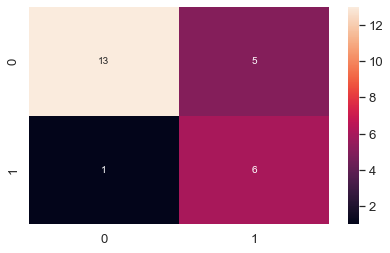

In [173]:
# Predicting the Test set results
y_predict_test = Kyphosis_decision_tree.predict(X_test)
Kyphosis_decision_tree_test_evaluation = confusion_matrix(y_test, y_predict_test)
print(Kyphosis_decision_tree_test_evaluation)
kyphosis_dc_accuracy = accuracy_score(y_test, y_predict_test)
kyphosis_dc_accuracy
Kyphosis_dc_roc_auc = roc_auc_score(y_test, y_predict_test)
print('Accuracy on Test set',kyphosis_dc_accuracy)
print('ROC-AUC Score on Test set:',Kyphosis_dc_roc_auc)
sns.heatmap(Kyphosis_decision_tree_test_evaluation, annot=True)

[Text(0.5, 0.9285714285714286, 'X[2] <= 12.5\ngini = 0.293\nsamples = 56\nvalue = [46, 10]'),
 Text(0.3076923076923077, 0.7857142857142857, 'X[0] <= 35.0\ngini = 0.499\nsamples = 19\nvalue = [10, 9]'),
 Text(0.15384615384615385, 0.6428571428571429, 'X[1] <= 6.0\ngini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(0.07692307692307693, 0.5, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.23076923076923078, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.46153846153846156, 0.6428571428571429, 'X[0] <= 139.5\ngini = 0.473\nsamples = 13\nvalue = [5, 8]'),
 Text(0.38461538461538464, 0.5, 'X[1] <= 2.5\ngini = 0.397\nsamples = 11\nvalue = [3, 8]'),
 Text(0.3076923076923077, 0.35714285714285715, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.46153846153846156, 0.35714285714285715, 'X[0] <= 70.5\ngini = 0.198\nsamples = 9\nvalue = [1, 8]'),
 Text(0.38461538461538464, 0.21428571428571427, 'X[0] <= 63.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.3076923076923077, 0.0714

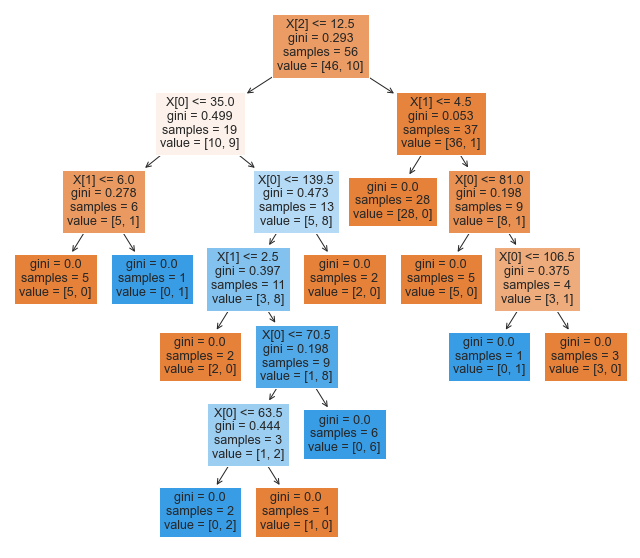

In [174]:
fig = plt.figure(figsize = (10,10))
sklearn.tree.plot_tree(Kyphosis_decision_tree, filled = True)

In [175]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.93      0.72      0.81        18
           1       0.55      0.86      0.67         7

    accuracy                           0.76        25
   macro avg       0.74      0.79      0.74        25
weighted avg       0.82      0.76      0.77        25



[[15  3]
 [ 3  4]]
Accuracy on Train set 0.8392857142857143
Accuracy on Test set 0.76
F1-score on Test set: 0.5714285714285714
ROC-AUC Score on Test set: 0.7023809523809523
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        18
           1       0.57      0.57      0.57         7

    accuracy                           0.76        25
   macro avg       0.70      0.70      0.70        25
weighted avg       0.76      0.76      0.76        25



<AxesSubplot:>

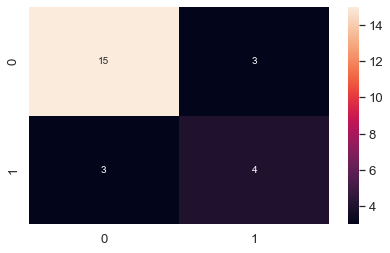

In [176]:
NB_kyphosis = GaussianNB()

# fit the model
NB_kyphosis.fit(X_train, y_train)

y_kyphosis_predict_NB = NB_kyphosis.predict(X_test)

# model score
kyphosis_predict_train_NB = NB_kyphosis.predict(X_train)
kyphosis_predict_test_NB = NB_kyphosis.predict(X_test)

# accuracy score
NB_train_score_kyphosis = NB_kyphosis.score(X_train,y_train)
NB_test_score_kyphosis = NB_kyphosis.score(X_test,y_test)

# f1-score
NB_f1_score_kyphosis = metrics.f1_score(y_test,kyphosis_predict_test_NB)
NB_recall_kyphosis = metrics.recall_score(y_test, kyphosis_predict_test_NB)
Kyphosis_NB_roc_auc = roc_auc_score(y_test, kyphosis_predict_test_NB)

kyphosis_NB_evaluation = confusion_matrix(y_test, y_kyphosis_predict_NB)
print(kyphosis_NB_evaluation)
print('Accuracy on Train set',NB_train_score_kyphosis)
print('Accuracy on Test set',NB_test_score_kyphosis)
print('F1-score on Test set:',NB_f1_score_kyphosis)
print('ROC-AUC Score on Test set:',Kyphosis_NB_roc_auc)
print(metrics.classification_report(y_test, kyphosis_predict_test_NB))
sns.heatmap(kyphosis_NB_evaluation, annot=True)

In [177]:
print(classification_report(y_test, y_kyphosis_predict_NB))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        18
           1       0.57      0.57      0.57         7

    accuracy                           0.76        25
   macro avg       0.70      0.70      0.70        25
weighted avg       0.76      0.76      0.76        25



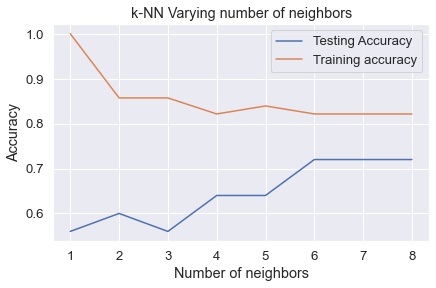

In [178]:
#Setup arrays to store training and test accuracies
kyphosis_knn_neighbors = np.arange(1,9)
kyphosis_knn_train_accuracy =np.empty(len(kyphosis_knn_neighbors))
kyphosis_knn_test_accuracy = np.empty(len(kyphosis_knn_neighbors))

for i,k in enumerate(kyphosis_knn_neighbors):
    #Setup a knn classifier with k neighbors
    kyphosis_knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    kyphosis_knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    kyphosis_knn_train_accuracy[i] = kyphosis_knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    kyphosis_knn_test_accuracy[i] = kyphosis_knn.score(X_test, y_test) 
    
    #Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(kyphosis_knn_neighbors, kyphosis_knn_test_accuracy, label='Testing Accuracy')
plt.plot(kyphosis_knn_neighbors, kyphosis_knn_train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

[[18  0]
 [ 7  0]]
Accuracy on Test set 0.72
ROC-AUC Score on Test set: 0.5
              precision    recall  f1-score   support

           0       0.72      1.00      0.84        18
           1       0.00      0.00      0.00         7

    accuracy                           0.72        25
   macro avg       0.36      0.50      0.42        25
weighted avg       0.52      0.72      0.60        25



C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot:>

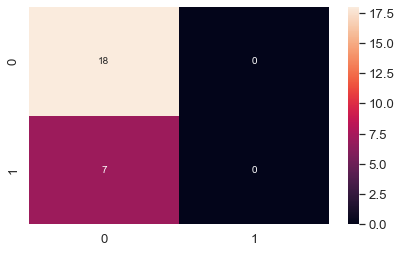

In [179]:
#Setup a KNN classifier with k neighbors
kyphosis_knn = KNeighborsClassifier(n_neighbors=6)

#Fit the model
kyphosis_knn.fit(X_train,y_train)

#Get accuracy
kyphosis_knn.score(X_test,y_test)

#let us get the predictions using the classifier we had fit above
kyphosis_knn_prediction = kyphosis_knn.predict(X_test)

kyphosis_knn_evaluation = confusion_matrix(y_test,kyphosis_knn_prediction)
kyphosis_knn_roc_auc = roc_auc_score(y_test, kyphosis_knn_prediction)
print(kyphosis_knn_evaluation)
kyphosis_knn_accuracy = accuracy_score(y_test, kyphosis_knn_prediction)
print('Accuracy on Test set',kyphosis_knn_accuracy)
print('ROC-AUC Score on Test set:',kyphosis_knn_roc_auc)
print(classification_report(y_test, kyphosis_knn_prediction))
sns.heatmap(kyphosis_knn_evaluation, annot=True)

[[18  0]
 [ 7  0]]
Accuracy on Test set 0.72
ROC-AUC Score on Test set: 0.5
              precision    recall  f1-score   support

           0       0.72      1.00      0.84        18
           1       0.00      0.00      0.00         7

    accuracy                           0.72        25
   macro avg       0.36      0.50      0.42        25
weighted avg       0.52      0.72      0.60        25



C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot:>

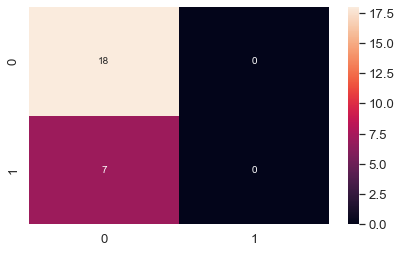

In [180]:
from sklearn.svm import SVC 
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score,accuracy_score

kyphosis_svc_model = SVC()
kyphosis_svc_model.fit(X_train, y_train)

y_kyphosis_svm_predict = kyphosis_svc_model.predict(X_test)
kyphosis_svc_evaluation = confusion_matrix(y_test, y_kyphosis_svm_predict)
kyphosis_svc_accuracy = accuracy_score(y_test, y_kyphosis_svm_predict)
kyphosis_svc_roc_auc = roc_auc_score(y_test, y_kyphosis_svm_predict)
print(kyphosis_svc_evaluation)
print('Accuracy on Test set',kyphosis_svc_accuracy)
print('ROC-AUC Score on Test set:',kyphosis_svc_roc_auc)
print(classification_report(y_test, y_kyphosis_svm_predict))
sns.heatmap(kyphosis_svc_evaluation, annot=True)

In [181]:
from sklearn.ensemble import RandomForestClassifier
Kyphosis_RandomForest = RandomForestClassifier(n_estimators=100)
Kyphosis_RandomForest.fit(X_train, y_train)

RandomForestClassifier()

[[46  0]
 [ 0 10]]


<AxesSubplot:>

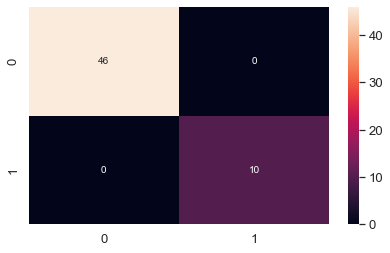

In [182]:
# Predicting the Training set results
y_predict_train = Kyphosis_RandomForest.predict(X_train)
y_predict_train
Kyphosis_RandomForest_Train_Evaluation = confusion_matrix(y_train, y_predict_train)
print(Kyphosis_RandomForest_Train_Evaluation)
sns.heatmap(Kyphosis_RandomForest_Train_Evaluation, annot=True)

[[13  5]
 [ 1  6]]
Accuracy on Test set 0.76
ROC-AUC Score on Test set: 0.7896825396825398
              precision    recall  f1-score   support

           0       0.93      0.72      0.81        18
           1       0.55      0.86      0.67         7

    accuracy                           0.76        25
   macro avg       0.74      0.79      0.74        25
weighted avg       0.82      0.76      0.77        25



<AxesSubplot:>

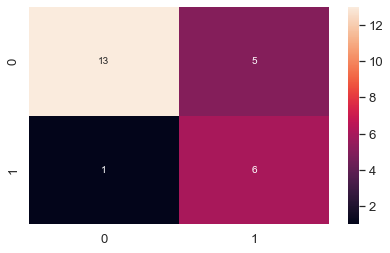

In [183]:
# Predicting the Test set results
y_predict_test = Kyphosis_RandomForest.predict(X_test)
Kyphosis_RandomForest_Test_Evaluation = confusion_matrix(y_test, y_predict_test)
kyphosis_RF_accuracy = accuracy_score(y_test, y_predict_test)
kyphosis_RF_roc_auc = roc_auc_score(y_test, y_predict_test)
print(Kyphosis_RandomForest_Test_Evaluation)
print('Accuracy on Test set',kyphosis_RF_accuracy)
print('ROC-AUC Score on Test set:',kyphosis_RF_roc_auc)
print(classification_report(y_test, y_predict_test))
sns.heatmap(Kyphosis_RandomForest_Test_Evaluation, annot=True)

In [184]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.93      0.72      0.81        18
           1       0.55      0.86      0.67         7

    accuracy                           0.76        25
   macro avg       0.74      0.79      0.74        25
weighted avg       0.82      0.76      0.77        25



### Model Improvement

In [185]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('whitegrid')
plt.style.use('seaborn-deep')

import warnings
warnings.filterwarnings('ignore')
import sklearn.metrics as skm
import sklearn.model_selection as skms
import sklearn.preprocessing as skp
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
#import lightgbm as lgb
#from imblearn.under_sampling import RandomUnderSampler
#from imblearn.over_sampling import RandomOverSampler
#from imblearn.over_sampling import SMOTE
import random


seed = 12
np.random.seed(seed)

from datetime import date

In [186]:
# read the data using pandas dataframe
kyphosis = pd.read_csv('kyphosis.csv')


kyphosis.head(5)

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [187]:
# important funtions
def datasetShape(df):
    rows, cols = df.shape
    print("The dataframe has",rows,"rows and",cols,"columns.")
    
# select numerical and categorical features
def divideFeatures(df):
    numerical_features = df.select_dtypes(include=[np.number])
    categorical_features = df.select_dtypes(include=[np.object]).drop('Kyphosis', axis=1)
    return numerical_features, categorical_features

In [188]:
kyphosis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [189]:
# check null values

pd.DataFrame(kyphosis.isnull().sum(), columns=["Null Count"]).style.background_gradient(cmap='Blues')

,Null Count
Kyphosis,0
Age,0
Number,0
Start,0


In [190]:
numerical_features, categorical_features = divideFeatures(kyphosis)

In [191]:
LabelEncoder_y = LabelEncoder()
kyphosis['Kyphosis'] = LabelEncoder_y.fit_transform(kyphosis['Kyphosis'])

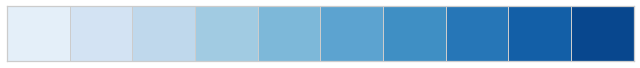

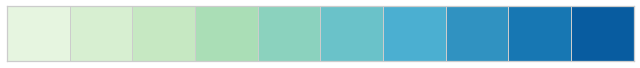

In [192]:
sns.color_palette("Blues", as_cmap=True)
GnBu_palette = sns.color_palette("GnBu",10)
Blues_palette = sns.color_palette("Blues",10)
sns.palplot(Blues_palette)
sns.palplot(GnBu_palette)

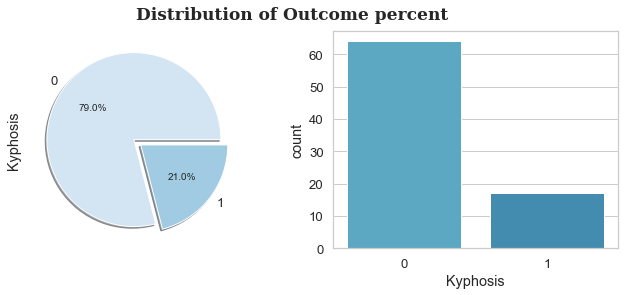

In [193]:
fig, axes = plt.subplots(1,2,figsize=(10,4))

kyphosis['Kyphosis'].value_counts().plot.pie(
    explode=[0,0.1],autopct='%1.1f%%',ax=axes[0],shadow=True, colors=[Blues_palette[1],Blues_palette[3]]
)

sns.countplot('Kyphosis',data=kyphosis,ax=axes[1], palette=[GnBu_palette[6],GnBu_palette[7]])
axes[1].patch.set_alpha(0)

fig.text(0.28,0.92,"Distribution of Outcome percent", fontweight="bold", fontfamily='serif', fontsize=17)

plt.show()

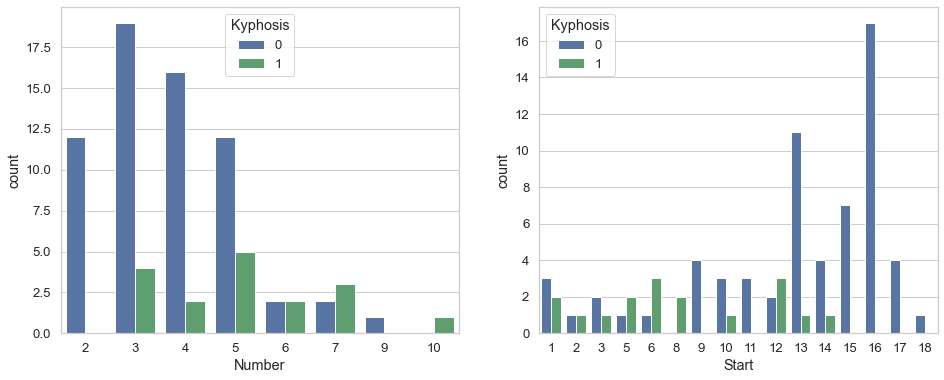

In [194]:
# Distribution of discrete data over output column
discrete_features = numerical_features.select_dtypes(include=['integer'])

fig, axes = plt.subplots(1,2, figsize=(14,6) )
#fig, ax =plt.subplots(1,2)
sns.countplot(x = 'Number', hue = 'Kyphosis', data=kyphosis, ax=axes[0])
sns.countplot(x = 'Start', hue = 'Kyphosis', data=kyphosis, ax=axes[1])
fig.show()

- Vertebrae number 1 and 9 are the only ones with no cases of kyphosis
- Vertebrae number 7 and 10 show more cases of kyphosis than non-kyphosis cases
- The start vertebrae numbers 5, 6, 8 and 12 have more cases of scyphosis than non-syphosis cases

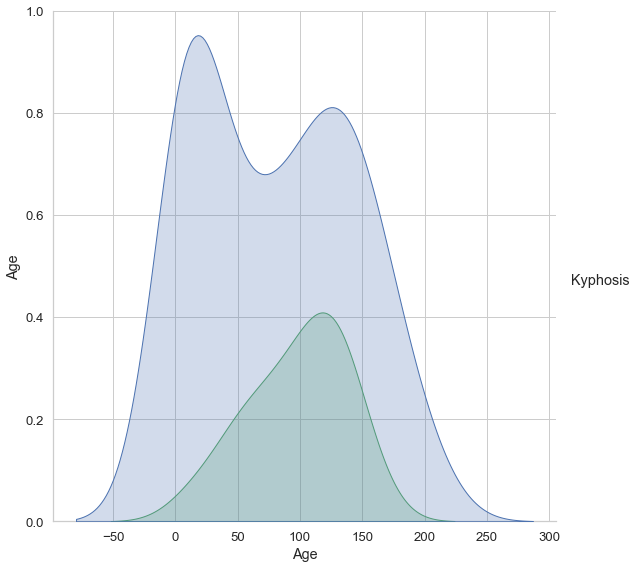

In [195]:
sns.pairplot(kyphosis, hue = 'Kyphosis', vars = ['Age'],  height=8 )

In [196]:
kyphosis[kyphosis.columns[:5]].corr().style.background_gradient(cmap='Blues')

,Kyphosis,Age,Number,Start
Kyphosis,1.000000,0.126465,0.360935,-0.445943
Age,0.126465,1.000000,-0.016687,0.057828
Number,0.360935,-0.016687,1.000000,-0.425099
Start,-0.445943,0.057828,-0.425099,1.000000


- There is a rather moderate negative correlation between 'start' and "Kyphosis"

In [197]:
# extract all skewed features
skewed_features = numerical_features.apply(lambda x: x.skew()).sort_values(ascending=False)

In [198]:
# transform skewed features
for feat in skewed_features.index:
    if skewed_features.loc[feat] > 0.5:
        kyphosis[feat] = np.log1p(kyphosis[feat])

In [199]:
# shuffle samples
df_shuffle = kyphosis.sample(frac=1, random_state=seed).reset_index(drop=True)

In [200]:
df_y = df_shuffle.pop('Kyphosis')
df_X = df_shuffle

# split into train dev and test
X_train, X_test, y_train, y_test = skms.train_test_split(df_X, df_y, train_size=0.7, random_state=seed)
print(f"Train set has {X_train.shape[0]} records out of {len(df_shuffle)} which is {round(X_train.shape[0]/len(df_shuffle)*100)}%")
print(f"Test set has {X_test.shape[0]} records out of {len(df_shuffle)} which is {round(X_test.shape[0]/len(df_shuffle)*100)}%")

Train set has 56 records out of 81 which is 69%
Test set has 25 records out of 81 which is 31%


Train set has 56 records out of 81 which is 69%
Test set has 25 records out of 81 which is 31%

In [201]:
#Fearture Scaling
scaler = skp.StandardScaler()

# apply scaling to all numerical variables (float64) except dummy variables as they are already between 0 and 1

X_train[numerical_features.columns] = scaler.fit_transform(X_train[numerical_features.columns])

# scale test data with transform()
X_test[numerical_features.columns] = scaler.transform(X_test[numerical_features.columns])


# view sample data
X_train.describe()

,Age,Number,Start
count,5.600000e+01,5.600000e+01,5.600000e+01
mean,-5.154607e-17,6.299524e-16,7.930164e-17
std,1.009050e+00,1.009050e+00,1.009050e+00
min,-1.565504e+00,-1.628738e+00,-1.968357e+00
25%,-9.508767e-01,-6.647862e-01,-9.662844e-01
50%,1.759405e-01,8.291254e-02,3.364101e-01
75%,8.371307e-01,6.938269e-01,8.374465e-01
max,1.675259e+00,2.724838e+00,1.438690e+00


### KNN Model Improvement for Kyphosis

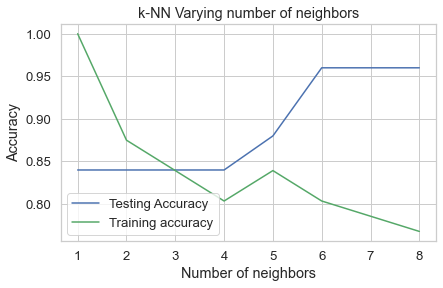

In [202]:
#Setup arrays to store training and test accuracies
kyphosis_improved_knn_neighbors = np.arange(1,9)
kyphosis_improved_knn_train_accuracy =np.empty(len(kyphosis_improved_knn_neighbors))
kyphosis_improved_knn_test_accuracy = np.empty(len(kyphosis_improved_knn_neighbors))

for i,k in enumerate(kyphosis_improved_knn_neighbors):
    #Setup a knn classifier with k neighbors
    kyphosis_improved_knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    kyphosis_improved_knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    kyphosis_improved_knn_train_accuracy[i] = kyphosis_improved_knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    kyphosis_improved_knn_test_accuracy[i] = kyphosis_improved_knn.score(X_test, y_test) 
    
    #Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(kyphosis_improved_knn_neighbors, kyphosis_improved_knn_test_accuracy, label='Testing Accuracy')
plt.plot(kyphosis_improved_knn_neighbors, kyphosis_improved_knn_train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

[[23  0]
 [ 1  1]]
Accuracy on Test set 0.96
ROC-AUC Score on Test set: 0.75
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        23
           1       1.00      0.50      0.67         2

    accuracy                           0.96        25
   macro avg       0.98      0.75      0.82        25
weighted avg       0.96      0.96      0.95        25



<AxesSubplot:>

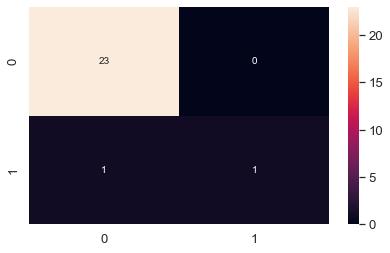

In [203]:
#Setup a KNN classifier with k neighbors
kyphosis_improved_knn = KNeighborsClassifier(n_neighbors=6)

#Fit the model
kyphosis_improved_knn.fit(X_train,y_train)

#Get accuracy
kyphosis_improved_knn.score(X_test,y_test)

#let us get the predictions using the classifier we had fit above
kyphosis_improved_knn_prediction = kyphosis_improved_knn.predict(X_test)

kyphosis_improved_knn_evaluation = confusion_matrix(y_test,kyphosis_improved_knn_prediction)
improved_kyphosis_knn_accuracy = accuracy_score(y_test, kyphosis_improved_knn_prediction)
improved_kyphosis_knn_roc_auc = roc_auc_score(y_test, kyphosis_improved_knn_prediction)
print(kyphosis_improved_knn_evaluation)
print('Accuracy on Test set',improved_kyphosis_knn_accuracy)
print('ROC-AUC Score on Test set:',improved_kyphosis_knn_roc_auc)
print(classification_report(y_test, kyphosis_improved_knn_prediction))
sns.heatmap(kyphosis_improved_knn_evaluation, annot=True)

### SVM Model Improvement for Kyphosis

[[23  0]
 [ 2  0]]
Accuracy on Test set 0.92
ROC-AUC Score on Test set: 0.5
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        23
           1       0.00      0.00      0.00         2

    accuracy                           0.92        25
   macro avg       0.46      0.50      0.48        25
weighted avg       0.85      0.92      0.88        25



<AxesSubplot:>

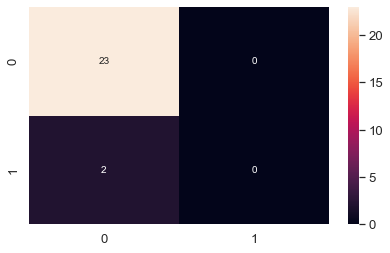

In [204]:
from sklearn.svm import SVC 
from sklearn.metrics import classification_report, confusion_matrix

kyphosis_improved_svc_model = SVC()
kyphosis_improved_svc_model.fit(X_train, y_train)

y_kyphosis_improved_svm_predict = kyphosis_svc_model.predict(X_test)
kyphosis_improved_svc_evaluation = confusion_matrix(y_test, y_kyphosis_improved_svm_predict)
improved_kyphosis_SVM_accuracy = accuracy_score(y_test, y_kyphosis_improved_svm_predict)
improved_kyphosis_SVM_roc_auc = roc_auc_score(y_test, y_kyphosis_improved_svm_predict)
print(kyphosis_improved_svc_evaluation)
print('Accuracy on Test set',improved_kyphosis_SVM_accuracy)
print('ROC-AUC Score on Test set:',improved_kyphosis_SVM_roc_auc)
print(classification_report(y_test, y_kyphosis_improved_svm_predict))
sns.heatmap(kyphosis_improved_svc_evaluation, annot=True)

### Random Forest Model Improvement for Kyphosis

In [205]:
# Evaluation function definition

def get_clf_eval(y_test, pred = None, pred_proba = None):
    confusion = confusion_matrix(y_test, pred)
    accuacy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    
    print('confusion')
    print(confusion)
    print('accuracy : {}'.format(np.around(accuacy,4)))
    print('precision: {}'.format(np.around(precision,4)))
    print('recall : {}'.format(np.around(recall,4)))
    print('F1 : {}'.format(np.around(f1,4)))  
    print('ROC_AUC : {}'.format(np.around(roc_auc,4)))
    print(classification_report(y_test, pred))

In [206]:
rf_clf = RandomForestClassifier()
param = {'n_estimators' : [100],
         'max_depth':[8,9,10],
         'min_samples_split':[2,5,7],
         'min_samples_leaf':[6.5,7,7.5]
        }

In [207]:
grid = GridSearchCV(rf_clf,param_grid = param,scoring = 'accuracy',cv=5)
grid.fit(X_train ,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [8, 9, 10],
                         'min_samples_leaf': [6.5, 7, 7.5],
                         'min_samples_split': [2, 5, 7],
                         'n_estimators': [100]},
             scoring='accuracy')

In [208]:
grid.best_params_

{'max_depth': 9,
 'min_samples_leaf': 7,
 'min_samples_split': 5,
 'n_estimators': 100}

confusion
[[23  0]
 [ 1  1]]
accuracy : 0.96
precision: 1.0
recall : 0.5
F1 : 0.6667
ROC_AUC : 0.9565
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        23
           1       1.00      0.50      0.67         2

    accuracy                           0.96        25
   macro avg       0.98      0.75      0.82        25
weighted avg       0.96      0.96      0.95        25



<AxesSubplot:>

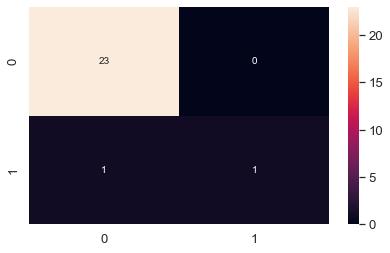

In [209]:
pred = grid.predict(X_test)
pred_proba = grid.predict_proba(X_test)[:,1]
get_clf_eval(y_test, pred, pred_proba)
sns.heatmap(confusion_matrix(y_test, pred), annot=True)

# ===============THANK YOU===============